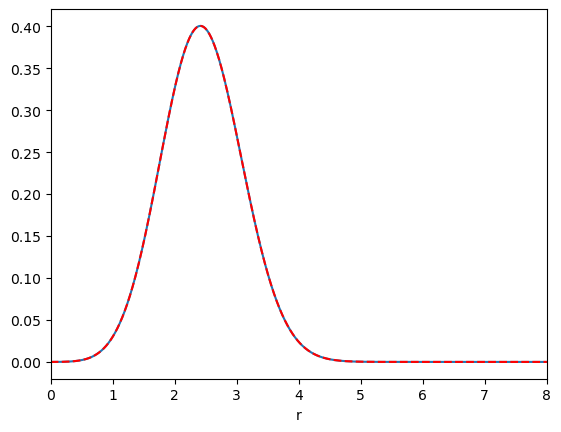

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 400                                                   # Truncation ordem

L0 = 1                                               # Map parameter 

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)             

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials): 

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))                                                  

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2)) 

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)                     


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)                                    

r0 = 2

A0 = 0.08156369051




sigma = 1

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)
  
a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2)) 

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)                     

psiplot = SBplot[0:(N+1),:] 
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))      


Phiplot = np.dot(a0, psiplot)


erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.show()



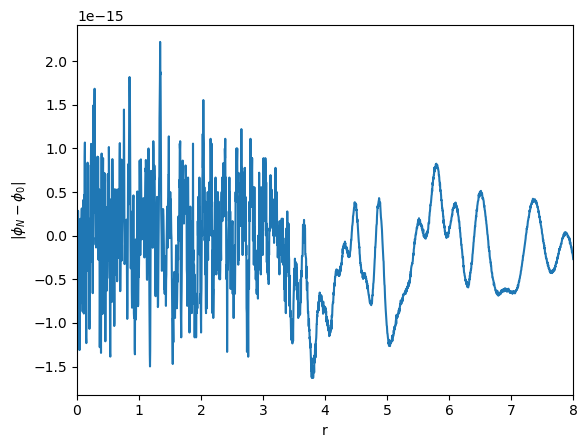

In [2]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.show()

In [3]:
Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001
  
Chi=np.dot(c0,psi)    
rChi=np.dot(c0,rpsi)
rrChi=np.dot(c0,rrpsi)     

H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2

JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi     # Jacobian Matrix

inv_JH = np.linalg.inv(JH)

N_int = 50

tol = 1e-40    # tolerance

# Newton Raphson loop
for i in range(N_int):
  Chi=np.dot(c0,psi)
  rChi=np.dot(c0,rpsi)
  rrChi=np.dot(c0,rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi + 1/2*(rPhi)**2
  JH = 8*np.dot(c0,rpsi)*rpsi + 4*rrpsi + 8/r*rpsi
  cnew = c0 - np.dot(H0, inv_JH)
  if min(abs(cnew-c0)) < tol:
    break
  print(min(abs(cnew-c0)), end=' ')
  c0 = cnew

#out_c = open('c0_30_L02.txt', 'a')
#out_c.write(' ' +' '.join(str('%.18f'%n) for n in c0)+'\n')
#out_c.close()


0.0010002505016765608 2.8674824578585984e-07 2.207716455674652e-08 6.3726918141150244e-09 1.1634075982951914e-09 2.2210349350989988e-10 4.194408359679008e-11 7.916626546364329e-12 1.4940309412751822e-12 2.8195016807455757e-13 5.320888074257659e-14 1.004143399568331e-14 1.8949917032486674e-15 3.576176158379897e-16 6.748852733649251e-17 1.2736390674544848e-17 2.403548674673794e-18 4.535807723362254e-19 8.558362795273974e-20 1.617182112193148e-20 3.0172354932119136e-21 5.95726349093384e-22 1.1803206969890726e-22 

Field equations

In [4]:
# Equation for Krr: momentum constraint

# Initial values of Krr: Base functions of Krr

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])


# Base functions for Beta

SB2 = np.zeros([N+1,N+1])      
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))                                                  

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)

    

Quadrature Integration

In [5]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1) 

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)   

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))                                                  

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)                                         


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)      
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi) 


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
qrSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
qrrSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1) 

# Alpha na origem

psi_0 = np.zeros(N+1)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2  

#Alpha_0 = 1 + np.dot(al0, psi_0) 

In [ ]:
# Runge Kutta 4th order

h = 0.001   # step size
tf = 15

It = int(tf/h)

t1 = np.linspace(0, tf, It) 
#t1 = np.linspace(0, tf, len(Alpha_origin)) 
t = 0

#phi_set = np.zeros([It,M])   
chi_set = np.zeros([It,M])
pi_set = np.zeros([It,M])
#L2HC = np.zeros([It])  
#Alpha_origin = np.zeros([It])
#phi_origin = np.zeros([It])
Alpha_origin = []
phi_origin = []
L2HC = []
phi_set = []

Alpha_origin1 = np.zeros([It])
phi_origin1 = np.zeros([It])

V = 0

#for i in range(It): 
while t <= tf:
 
  # First step
  Phi = np.dot(a0, psi)      
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)      
  Pi = np.dot(b0, psi) 
  rPi= np.dot(b0, rpsi)
  Chi = np.dot(c0, psi) 
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)   
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)   
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  
  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)      
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi) 
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi) 
  qKrr = np.dot(ck0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8*rqChi/rq + 3/4*np.exp(-4*qChi)*qKrr**2 + np.exp(4*qChi)*(1/2*qPi**2 + np.exp(-4*qChi)/2*rqPhi**2)   # Hamiltonian constraint (HC)
  L2HC.append((1/2*np.dot(H**2,wq_col))**1/2)    # L2 error of HC 
  
  # Alpha origin
  Alpha_origin.append(1 + np.dot(al0, psi_0))
#  print(Alpha_origin)
  
  # Phi origin:  
  phi_origin.append(np.dot(a0, psi_0))
#  print(phi_origin)
    
  # Second step
  Phi = np.dot(a0 + L1/2, psi)     
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi) 
  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)
  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)     
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi) 
  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)
  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db) 

  # Forth step
  Phi = np.dot(a0 + L3, psi)     
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi) 
  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)
  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)
  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1 
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1) 
  rKrr = np.dot(ck0, rSB1)
  Matrix_Alpha = rrpsi + 2*(1/r + rChi)*rpsi - 3/2*np.exp(-4*Chi)*Krr**2*psi - np.exp(4*Chi)*(Pi**2 - V)*psi 
  inv_matrix_alpha = np.linalg.inv(Matrix_Alpha)
  rhsal = 3/2*np.exp(-4*Chi)*Krr**2 + np.exp(4*Chi)*(Pi**2-V)
  al0 = np.dot(rhsal, inv_matrix_alpha)
  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)
  Matrix_Beta = rSB2/r - SB2/r**2
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr/r
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*(2*Alpha/r + rAlpha + 2*rChi*Alpha)*rPhi + np.exp(-4*Chi)*Alpha*rrPhi - Alpha* V, inv_psi)   
  dc = np.dot(Beta*rChi + Beta/2/r + Alpha/4*np.exp(-4*Chi)*Krr, inv_psi)    
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)   
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)  
  
  t = t + h
  print(t)
    
  if t > 9:
    h = 0.0001
  #  Alpha_origin1[i] = 1 + np.dot(al0, psi_0)
  #  phi_origin1[i] = np.dot(a0, psi_0)
    
  # Evolution functions
  a0 = a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4)
  b0 = b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4)
  c0 = c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)  
  phi_set.append(np.dot(a0, psiplot))

#  pi_set[i,:] = np.dot(b0, psiplot)
#  chi_set[i,:] = np.dot(c0, psiplot)
  
  





0.001
0.002
0.003
0.004
0.005
0.006
0.007
0.008
0.009000000000000001
0.010000000000000002
0.011000000000000003
0.012000000000000004
0.013000000000000005
0.014000000000000005
0.015000000000000006
0.016000000000000007
0.017000000000000008
0.01800000000000001
0.01900000000000001
0.02000000000000001
0.02100000000000001
0.022000000000000013
0.023000000000000013
0.024000000000000014
0.025000000000000015
0.026000000000000016
0.027000000000000017
0.028000000000000018
0.02900000000000002
0.03000000000000002
0.03100000000000002
0.03200000000000002
0.03300000000000002
0.03400000000000002
0.035000000000000024
0.036000000000000025
0.037000000000000026
0.03800000000000003
0.03900000000000003
0.04000000000000003
0.04100000000000003
0.04200000000000003
0.04300000000000003
0.04400000000000003
0.04500000000000003
0.046000000000000034
0.047000000000000035
0.048000000000000036
0.04900000000000004
0.05000000000000004
0.05100000000000004
0.05200000000000004
0.05300000000000004
0.05400000000000004
0.05500000

0.4230000000000003
0.4240000000000003
0.4250000000000003
0.4260000000000003
0.4270000000000003
0.4280000000000003
0.4290000000000003
0.4300000000000003
0.4310000000000003
0.43200000000000033
0.43300000000000033
0.43400000000000033
0.43500000000000033
0.43600000000000033
0.43700000000000033
0.43800000000000033
0.43900000000000033
0.44000000000000034
0.44100000000000034
0.44200000000000034
0.44300000000000034
0.44400000000000034
0.44500000000000034
0.44600000000000034
0.44700000000000034
0.44800000000000034
0.44900000000000034
0.45000000000000034
0.45100000000000035
0.45200000000000035
0.45300000000000035
0.45400000000000035
0.45500000000000035
0.45600000000000035
0.45700000000000035
0.45800000000000035
0.45900000000000035
0.46000000000000035
0.46100000000000035
0.46200000000000035
0.46300000000000036
0.46400000000000036
0.46500000000000036
0.46600000000000036
0.46700000000000036
0.46800000000000036
0.46900000000000036
0.47000000000000036
0.47100000000000036
0.47200000000000036
0.4730000

0.8530000000000006
0.8540000000000006
0.8550000000000006
0.8560000000000006
0.8570000000000007
0.8580000000000007
0.8590000000000007
0.8600000000000007
0.8610000000000007
0.8620000000000007
0.8630000000000007
0.8640000000000007
0.8650000000000007
0.8660000000000007
0.8670000000000007
0.8680000000000007
0.8690000000000007
0.8700000000000007
0.8710000000000007
0.8720000000000007
0.8730000000000007
0.8740000000000007
0.8750000000000007
0.8760000000000007
0.8770000000000007
0.8780000000000007
0.8790000000000007
0.8800000000000007
0.8810000000000007
0.8820000000000007
0.8830000000000007
0.8840000000000007
0.8850000000000007
0.8860000000000007
0.8870000000000007
0.8880000000000007
0.8890000000000007
0.8900000000000007
0.8910000000000007
0.8920000000000007
0.8930000000000007
0.8940000000000007
0.8950000000000007
0.8960000000000007
0.8970000000000007
0.8980000000000007
0.8990000000000007
0.9000000000000007
0.9010000000000007
0.9020000000000007
0.9030000000000007
0.9040000000000007
0.9050000000

1.2909999999999686
1.2919999999999685
1.2929999999999684
1.2939999999999683
1.2949999999999682
1.295999999999968
1.296999999999968
1.2979999999999678
1.2989999999999677
1.2999999999999676
1.3009999999999675
1.3019999999999674
1.3029999999999673
1.3039999999999672
1.304999999999967
1.305999999999967
1.3069999999999669
1.3079999999999667
1.3089999999999666
1.3099999999999665
1.3109999999999664
1.3119999999999663
1.3129999999999662
1.313999999999966
1.314999999999966
1.3159999999999659
1.3169999999999658
1.3179999999999656
1.3189999999999655
1.3199999999999654
1.3209999999999653
1.3219999999999652
1.322999999999965
1.323999999999965
1.3249999999999649
1.3259999999999648
1.3269999999999647
1.3279999999999645
1.3289999999999644
1.3299999999999643
1.3309999999999642
1.331999999999964
1.332999999999964
1.3339999999999639
1.3349999999999638
1.3359999999999637
1.3369999999999636
1.3379999999999634
1.3389999999999633
1.3399999999999632
1.340999999999963
1.341999999999963
1.342999999999963
1.3439

1.7299999999999203
1.7309999999999202
1.73199999999992
1.73299999999992
1.7339999999999198
1.7349999999999197
1.7359999999999196
1.7369999999999195
1.7379999999999194
1.7389999999999193
1.7399999999999192
1.740999999999919
1.741999999999919
1.7429999999999188
1.7439999999999187
1.7449999999999186
1.7459999999999185
1.7469999999999184
1.7479999999999183
1.7489999999999182
1.749999999999918
1.750999999999918
1.7519999999999178
1.7529999999999177
1.7539999999999176
1.7549999999999175
1.7559999999999174
1.7569999999999173
1.7579999999999172
1.758999999999917
1.759999999999917
1.7609999999999169
1.7619999999999167
1.7629999999999166
1.7639999999999165
1.7649999999999164
1.7659999999999163
1.7669999999999162
1.767999999999916
1.768999999999916
1.7699999999999159
1.7709999999999158
1.7719999999999156
1.7729999999999155
1.7739999999999154
1.7749999999999153
1.7759999999999152
1.776999999999915
1.777999999999915
1.7789999999999149
1.7799999999999148
1.7809999999999147
1.7819999999999145
1.78299

2.170999999999872
2.171999999999872
2.1729999999998717
2.1739999999998716
2.1749999999998715
2.1759999999998714
2.1769999999998713
2.177999999999871
2.178999999999871
2.179999999999871
2.180999999999871
2.1819999999998707
2.1829999999998706
2.1839999999998705
2.1849999999998704
2.1859999999998703
2.18699999999987
2.18799999999987
2.18899999999987
2.18999999999987
2.1909999999998697
2.1919999999998696
2.1929999999998695
2.1939999999998694
2.1949999999998693
2.195999999999869
2.196999999999869
2.197999999999869
2.198999999999869
2.1999999999998687
2.2009999999998686
2.2019999999998685
2.2029999999998684
2.2039999999998683
2.204999999999868
2.205999999999868
2.206999999999868
2.207999999999868
2.2089999999998677
2.2099999999998676
2.2109999999998675
2.2119999999998674
2.2129999999998673
2.213999999999867
2.214999999999867
2.215999999999867
2.216999999999867
2.2179999999998667
2.2189999999998666
2.2199999999998665
2.2209999999998664
2.2219999999998663
2.222999999999866
2.223999999999866
2.

2.613999999999823
2.614999999999823
2.615999999999823
2.616999999999823
2.6179999999998227
2.6189999999998226
2.6199999999998225
2.6209999999998224
2.6219999999998223
2.622999999999822
2.623999999999822
2.624999999999822
2.625999999999822
2.6269999999998217
2.6279999999998216
2.6289999999998215
2.6299999999998214
2.6309999999998213
2.631999999999821
2.632999999999821
2.633999999999821
2.634999999999821
2.6359999999998207
2.6369999999998206
2.6379999999998205
2.6389999999998204
2.6399999999998203
2.64099999999982
2.64199999999982
2.64299999999982
2.64399999999982
2.6449999999998197
2.6459999999998196
2.6469999999998195
2.6479999999998194
2.6489999999998193
2.649999999999819
2.650999999999819
2.651999999999819
2.652999999999819
2.6539999999998187
2.6549999999998186
2.6559999999998185
2.6569999999998184
2.6579999999998183
2.658999999999818
2.659999999999818
2.660999999999818
2.661999999999818
2.6629999999998177
2.6639999999998176
2.6649999999998175
2.6659999999998174
2.6669999999998173
2.

3.0579999999997742
3.058999999999774
3.059999999999774
3.060999999999774
3.061999999999774
3.0629999999997737
3.0639999999997736
3.0649999999997735
3.0659999999997734
3.0669999999997732
3.067999999999773
3.068999999999773
3.069999999999773
3.070999999999773
3.0719999999997727
3.0729999999997726
3.0739999999997725
3.0749999999997724
3.0759999999997722
3.076999999999772
3.077999999999772
3.078999999999772
3.079999999999772
3.0809999999997717
3.0819999999997716
3.0829999999997715
3.0839999999997714
3.0849999999997713
3.085999999999771
3.086999999999771
3.087999999999771
3.088999999999771
3.0899999999997707
3.0909999999997706
3.0919999999997705
3.0929999999997704
3.0939999999997703
3.09499999999977
3.09599999999977
3.09699999999977
3.09799999999977
3.0989999999997697
3.0999999999997696
3.1009999999997695
3.1019999999997694
3.1029999999997693
3.103999999999769
3.104999999999769
3.105999999999769
3.106999999999769
3.1079999999997687
3.1089999999997686
3.1099999999997685
3.1109999999997684
3.

3.5009999999997254
3.5019999999997253
3.5029999999997252
3.503999999999725
3.504999999999725
3.505999999999725
3.506999999999725
3.5079999999997247
3.5089999999997246
3.5099999999997245
3.5109999999997243
3.5119999999997242
3.512999999999724
3.513999999999724
3.514999999999724
3.515999999999724
3.5169999999997237
3.5179999999997236
3.5189999999997235
3.5199999999997234
3.5209999999997232
3.521999999999723
3.522999999999723
3.523999999999723
3.524999999999723
3.5259999999997227
3.5269999999997226
3.5279999999997225
3.5289999999997224
3.5299999999997222
3.530999999999722
3.531999999999722
3.532999999999722
3.533999999999722
3.5349999999997217
3.5359999999997216
3.5369999999997215
3.5379999999997214
3.5389999999997213
3.539999999999721
3.540999999999721
3.541999999999721
3.542999999999721
3.5439999999997207
3.5449999999997206
3.5459999999997205
3.5469999999997204
3.5479999999997203
3.54899999999972
3.54999999999972
3.55099999999972
3.55199999999972
3.5529999999997197
3.5539999999997196
3.

3.9449999999996765
3.9459999999996764
3.9469999999996763
3.947999999999676
3.948999999999676
3.949999999999676
3.950999999999676
3.9519999999996758
3.9529999999996757
3.9539999999996756
3.9549999999996754
3.9559999999996753
3.956999999999675
3.957999999999675
3.958999999999675
3.959999999999675
3.960999999999675
3.9619999999996747
3.9629999999996746
3.9639999999996745
3.9649999999996743
3.9659999999996742
3.966999999999674
3.967999999999674
3.968999999999674
3.969999999999674
3.9709999999996737
3.9719999999996736
3.9729999999996735
3.9739999999996733
3.9749999999996732
3.975999999999673
3.976999999999673
3.977999999999673
3.978999999999673
3.9799999999996727
3.9809999999996726
3.9819999999996725
3.9829999999996724
3.9839999999996722
3.984999999999672
3.985999999999672
3.986999999999672
3.987999999999672
3.9889999999996717
3.9899999999996716
3.9909999999996715
3.9919999999996714
3.9929999999996713
3.993999999999671
3.994999999999671
3.995999999999671
3.996999999999671
3.9979999999996707

4.399999999999804
4.400999999999804
4.401999999999805
4.402999999999805
4.403999999999805
4.404999999999806
4.405999999999806
4.406999999999806
4.407999999999807
4.408999999999807
4.409999999999807
4.410999999999808
4.411999999999808
4.412999999999808
4.413999999999809
4.414999999999809
4.415999999999809
4.41699999999981
4.41799999999981
4.41899999999981
4.419999999999811
4.420999999999811
4.421999999999811
4.422999999999812
4.423999999999812
4.424999999999812
4.425999999999813
4.426999999999813
4.427999999999813
4.428999999999814
4.429999999999814
4.430999999999814
4.431999999999815
4.432999999999815
4.433999999999815
4.434999999999816
4.435999999999816
4.436999999999816
4.437999999999817
4.438999999999817
4.439999999999817
4.440999999999818
4.441999999999818
4.442999999999818
4.443999999999819
4.444999999999819
4.445999999999819
4.44699999999982
4.44799999999982
4.44899999999982
4.449999999999821
4.450999999999821
4.451999999999821
4.452999999999822
4.453999999999822
4.45499999999982

4.855999999999956
4.856999999999957
4.857999999999957
4.858999999999957
4.859999999999958
4.860999999999958
4.861999999999958
4.862999999999959
4.863999999999959
4.864999999999959
4.86599999999996
4.86699999999996
4.86799999999996
4.868999999999961
4.869999999999961
4.870999999999961
4.871999999999962
4.872999999999962
4.873999999999962
4.874999999999963
4.875999999999963
4.876999999999963
4.877999999999964
4.878999999999964
4.879999999999964
4.880999999999965
4.881999999999965
4.882999999999965
4.883999999999966
4.884999999999966
4.885999999999966
4.886999999999967
4.887999999999967
4.888999999999967
4.889999999999968
4.890999999999968
4.891999999999968
4.892999999999969
4.893999999999969
4.894999999999969
4.89599999999997
4.89699999999997
4.89799999999997
4.898999999999971
4.899999999999971
4.900999999999971
4.901999999999972
4.902999999999972
4.903999999999972
4.904999999999973
4.905999999999973
4.906999999999973
4.907999999999974
4.908999999999974
4.909999999999974
4.91099999999997

5.313000000000109
5.314000000000109
5.31500000000011
5.31600000000011
5.31700000000011
5.318000000000111
5.319000000000111
5.320000000000111
5.321000000000112
5.322000000000112
5.323000000000112
5.324000000000113
5.325000000000113
5.326000000000113
5.327000000000114
5.328000000000114
5.329000000000114
5.330000000000115
5.331000000000115
5.332000000000115
5.333000000000116
5.334000000000116
5.335000000000116
5.336000000000117
5.337000000000117
5.338000000000117
5.339000000000118
5.340000000000118
5.341000000000118
5.342000000000119
5.343000000000119
5.344000000000119
5.34500000000012
5.34600000000012
5.34700000000012
5.348000000000121
5.349000000000121
5.350000000000121
5.351000000000122
5.352000000000122
5.353000000000122
5.354000000000123
5.355000000000123
5.356000000000123
5.357000000000124
5.358000000000124
5.359000000000124
5.360000000000125
5.361000000000125
5.362000000000125
5.363000000000126
5.364000000000126
5.365000000000126
5.366000000000127
5.367000000000127
5.36800000000012

5.768000000000261
5.769000000000261
5.770000000000262
5.771000000000262
5.772000000000262
5.773000000000263
5.774000000000263
5.775000000000263
5.776000000000264
5.777000000000264
5.778000000000264
5.779000000000265
5.780000000000265
5.781000000000265
5.782000000000266
5.783000000000266
5.784000000000266
5.785000000000267
5.786000000000267
5.787000000000267
5.788000000000268
5.789000000000268
5.790000000000268
5.791000000000269
5.792000000000269
5.793000000000269
5.79400000000027
5.79500000000027
5.79600000000027
5.797000000000271
5.798000000000271
5.799000000000271
5.800000000000272
5.801000000000272
5.802000000000272
5.803000000000273
5.804000000000273
5.805000000000273
5.806000000000274
5.807000000000274
5.808000000000274
5.809000000000275
5.810000000000275
5.811000000000275
5.812000000000276
5.813000000000276
5.814000000000276
5.815000000000277
5.816000000000277
5.817000000000277
5.818000000000278
5.819000000000278
5.820000000000278
5.821000000000279
5.822000000000279
5.82300000000

6.223000000000413
6.224000000000413
6.2250000000004135
6.226000000000414
6.227000000000414
6.2280000000004145
6.229000000000415
6.230000000000415
6.2310000000004155
6.232000000000416
6.233000000000416
6.2340000000004165
6.235000000000417
6.236000000000417
6.2370000000004175
6.238000000000418
6.239000000000418
6.2400000000004185
6.241000000000419
6.242000000000419
6.2430000000004195
6.24400000000042
6.24500000000042
6.2460000000004205
6.247000000000421
6.248000000000421
6.2490000000004216
6.250000000000422
6.251000000000422
6.2520000000004226
6.253000000000423
6.254000000000423
6.2550000000004236
6.256000000000424
6.257000000000424
6.258000000000425
6.259000000000425
6.260000000000425
6.261000000000426
6.262000000000426
6.263000000000426
6.264000000000427
6.265000000000427
6.266000000000427
6.267000000000428
6.268000000000428
6.269000000000428
6.270000000000429
6.271000000000429
6.272000000000429
6.27300000000043
6.27400000000043
6.27500000000043
6.276000000000431
6.277000000000431
6.27

6.679000000000565
6.6800000000005655
6.681000000000566
6.682000000000566
6.6830000000005665
6.684000000000567
6.685000000000567
6.6860000000005675
6.687000000000568
6.688000000000568
6.6890000000005685
6.690000000000569
6.691000000000569
6.6920000000005695
6.69300000000057
6.69400000000057
6.6950000000005705
6.696000000000571
6.697000000000571
6.6980000000005715
6.699000000000572
6.700000000000572
6.7010000000005725
6.702000000000573
6.703000000000573
6.7040000000005735
6.705000000000574
6.706000000000574
6.7070000000005745
6.708000000000575
6.709000000000575
6.7100000000005755
6.711000000000576
6.712000000000576
6.7130000000005765
6.714000000000577
6.715000000000577
6.7160000000005775
6.717000000000578
6.718000000000578
6.7190000000005785
6.720000000000579
6.721000000000579
6.7220000000005795
6.72300000000058
6.72400000000058
6.7250000000005805
6.726000000000581
6.727000000000581
6.7280000000005815
6.729000000000582
6.730000000000582
6.7310000000005825
6.732000000000583
6.733000000000

7.137000000000718
7.138000000000718
7.139000000000719
7.140000000000719
7.141000000000719
7.14200000000072
7.14300000000072
7.14400000000072
7.145000000000721
7.146000000000721
7.147000000000721
7.148000000000722
7.149000000000722
7.1500000000007224
7.151000000000723
7.152000000000723
7.1530000000007234
7.154000000000724
7.155000000000724
7.1560000000007244
7.157000000000725
7.158000000000725
7.1590000000007254
7.160000000000726
7.161000000000726
7.1620000000007265
7.163000000000727
7.164000000000727
7.1650000000007275
7.166000000000728
7.167000000000728
7.1680000000007285
7.169000000000729
7.170000000000729
7.1710000000007295
7.17200000000073
7.17300000000073
7.1740000000007305
7.175000000000731
7.176000000000731
7.1770000000007315
7.178000000000732
7.179000000000732
7.1800000000007325
7.181000000000733
7.182000000000733
7.1830000000007335
7.184000000000734
7.185000000000734
7.1860000000007345
7.187000000000735
7.188000000000735
7.1890000000007355
7.190000000000736
7.191000000000736
7

7.59300000000087
7.594000000000871
7.595000000000871
7.596000000000871
7.597000000000872
7.598000000000872
7.599000000000872
7.600000000000873
7.601000000000873
7.602000000000873
7.603000000000874
7.604000000000874
7.605000000000874
7.606000000000875
7.607000000000875
7.608000000000875
7.609000000000876
7.610000000000876
7.611000000000876
7.612000000000877
7.613000000000877
7.614000000000877
7.615000000000878
7.616000000000878
7.617000000000878
7.618000000000879
7.619000000000879
7.620000000000879
7.62100000000088
7.62200000000088
7.62300000000088
7.624000000000881
7.625000000000881
7.626000000000881
7.627000000000882
7.628000000000882
7.629000000000882
7.630000000000883
7.631000000000883
7.632000000000883
7.633000000000884
7.634000000000884
7.635000000000884
7.636000000000885
7.637000000000885
7.638000000000885
7.639000000000886
7.640000000000886
7.641000000000886
7.642000000000887
7.643000000000887
7.644000000000887
7.645000000000888
7.646000000000888
7.647000000000888
7.648000000000

8.050000000000978
8.051000000000977
8.052000000000977
8.053000000000976
8.054000000000975
8.055000000000975
8.056000000000974
8.057000000000974
8.058000000000973
8.059000000000973
8.060000000000972
8.061000000000972
8.062000000000971
8.06300000000097
8.06400000000097
8.06500000000097
8.066000000000969
8.067000000000968
8.068000000000968
8.069000000000967
8.070000000000967
8.071000000000966
8.072000000000966
8.073000000000965
8.074000000000964
8.075000000000964
8.076000000000963
8.077000000000963
8.078000000000962
8.079000000000962
8.080000000000961
8.08100000000096
8.08200000000096
8.08300000000096
8.084000000000959
8.085000000000958
8.086000000000958
8.087000000000957
8.088000000000957
8.089000000000956
8.090000000000956
8.091000000000955
8.092000000000954
8.093000000000954
8.094000000000953
8.095000000000953
8.096000000000952
8.097000000000952
8.098000000000951
8.09900000000095
8.10000000000095
8.10100000000095
8.102000000000949
8.103000000000948
8.104000000000948
8.105000000000947
8

8.510000000000723
8.511000000000722
8.512000000000722
8.513000000000721
8.51400000000072
8.51500000000072
8.51600000000072
8.517000000000719
8.518000000000718
8.519000000000718
8.520000000000717
8.521000000000717
8.522000000000716
8.523000000000716
8.524000000000715
8.525000000000714
8.526000000000714
8.527000000000713
8.528000000000713
8.529000000000712
8.530000000000712
8.531000000000711
8.53200000000071
8.53300000000071
8.53400000000071
8.535000000000709
8.536000000000708
8.537000000000708
8.538000000000707
8.539000000000707
8.540000000000706
8.541000000000706
8.542000000000705
8.543000000000704
8.544000000000704
8.545000000000703
8.546000000000703
8.547000000000702
8.548000000000702
8.549000000000701
8.5500000000007
8.5510000000007
8.5520000000007
8.553000000000699
8.554000000000698
8.555000000000698
8.556000000000697
8.557000000000697
8.558000000000696
8.559000000000696
8.560000000000695
8.561000000000694
8.562000000000694
8.563000000000693
8.564000000000693
8.565000000000692
8.56

8.971000000000467
8.972000000000467
8.973000000000466
8.974000000000466
8.975000000000465
8.976000000000464
8.977000000000464
8.978000000000463
8.979000000000463
8.980000000000462
8.981000000000462
8.982000000000461
8.98300000000046
8.98400000000046
8.98500000000046
8.986000000000459
8.987000000000458
8.988000000000458
8.989000000000457
8.990000000000457
8.991000000000456
8.992000000000456
8.993000000000455
8.994000000000455
8.995000000000454
8.996000000000453
8.997000000000453
8.998000000000452
8.999000000000452
9.000000000000451
9.000100000000451
9.00020000000045
9.00030000000045
9.00040000000045
9.00050000000045
9.00060000000045
9.00070000000045
9.00080000000045
9.000900000000449
9.001000000000449
9.001100000000449
9.001200000000448
9.001300000000448
9.001400000000448
9.001500000000448
9.001600000000447
9.001700000000447
9.001800000000447
9.001900000000447
9.002000000000447
9.002100000000446
9.002200000000446
9.002300000000446
9.002400000000446
9.002500000000445
9.002600000000445
9.

9.04320000000035
9.04330000000035
9.04340000000035
9.04350000000035
9.04360000000035
9.04370000000035
9.04380000000035
9.043900000000349
9.044000000000349
9.044100000000348
9.044200000000348
9.044300000000348
9.044400000000348
9.044500000000347
9.044600000000347
9.044700000000347
9.044800000000347
9.044900000000347
9.045000000000346
9.045100000000346
9.045200000000346
9.045300000000346
9.045400000000345
9.045500000000345
9.045600000000345
9.045700000000345
9.045800000000344
9.045900000000344
9.046000000000344
9.046100000000344
9.046200000000344
9.046300000000343
9.046400000000343
9.046500000000343
9.046600000000343
9.046700000000342
9.046800000000342
9.046900000000342
9.047000000000342
9.047100000000341
9.047200000000341
9.047300000000341
9.04740000000034
9.04750000000034
9.04760000000034
9.04770000000034
9.04780000000034
9.04790000000034
9.04800000000034
9.048100000000339
9.048200000000339
9.048300000000339
9.048400000000338
9.048500000000338
9.048600000000338
9.048700000000338
9.0488

9.089300000000243
9.089400000000243
9.089500000000243
9.089600000000242
9.089700000000242
9.089800000000242
9.089900000000242
9.090000000000241
9.090100000000241
9.090200000000241
9.09030000000024
9.09040000000024
9.09050000000024
9.09060000000024
9.09070000000024
9.09080000000024
9.09090000000024
9.09100000000024
9.091100000000239
9.091200000000239
9.091300000000238
9.091400000000238
9.091500000000238
9.091600000000238
9.091700000000237
9.091800000000237
9.091900000000237
9.092000000000237
9.092100000000237
9.092200000000236
9.092300000000236
9.092400000000236
9.092500000000236
9.092600000000235
9.092700000000235
9.092800000000235
9.092900000000235
9.093000000000234
9.093100000000234
9.093200000000234
9.093300000000234
9.093400000000234
9.093500000000233
9.093600000000233
9.093700000000233
9.093800000000233
9.093900000000232
9.094000000000232
9.094100000000232
9.094200000000232
9.094300000000231
9.094400000000231
9.094500000000231
9.09460000000023
9.09470000000023
9.09480000000023
9.0

9.135400000000136
9.135500000000135
9.135600000000135
9.135700000000135
9.135800000000135
9.135900000000134
9.136000000000134
9.136100000000134
9.136200000000134
9.136300000000134
9.136400000000133
9.136500000000133
9.136600000000133
9.136700000000133
9.136800000000132
9.136900000000132
9.137000000000132
9.137100000000132
9.137200000000131
9.137300000000131
9.137400000000131
9.13750000000013
9.13760000000013
9.13770000000013
9.13780000000013
9.13790000000013
9.13800000000013
9.13810000000013
9.138200000000129
9.138300000000129
9.138400000000129
9.138500000000128
9.138600000000128
9.138700000000128
9.138800000000128
9.138900000000127
9.139000000000127
9.139100000000127
9.139200000000127
9.139300000000127
9.139400000000126
9.139500000000126
9.139600000000126
9.139700000000126
9.139800000000125
9.139900000000125
9.140000000000125
9.140100000000125
9.140200000000124
9.140300000000124
9.140400000000124
9.140500000000124
9.140600000000124
9.140700000000123
9.140800000000123
9.140900000000123

9.181600000000028
9.181700000000028
9.181800000000027
9.181900000000027
9.182000000000027
9.182100000000027
9.182200000000027
9.182300000000026
9.182400000000026
9.182500000000026
9.182600000000026
9.182700000000025
9.182800000000025
9.182900000000025
9.183000000000025
9.183100000000024
9.183200000000024
9.183300000000024
9.183400000000024
9.183500000000024
9.183600000000023
9.183700000000023
9.183800000000023
9.183900000000023
9.184000000000022
9.184100000000022
9.184200000000022
9.184300000000022
9.184400000000021
9.184500000000021
9.184600000000021
9.18470000000002
9.18480000000002
9.18490000000002
9.18500000000002
9.18510000000002
9.18520000000002
9.18530000000002
9.185400000000019
9.185500000000019
9.185600000000019
9.185700000000018
9.185800000000018
9.185900000000018
9.186000000000018
9.186100000000017
9.186200000000017
9.186300000000017
9.186400000000017
9.186500000000017
9.186600000000016
9.186700000000016
9.186800000000016
9.186900000000016
9.187000000000015
9.187100000000015

9.22819999999992
9.22829999999992
9.228399999999919
9.228499999999919
9.228599999999918
9.228699999999918
9.228799999999918
9.228899999999918
9.228999999999917
9.229099999999917
9.229199999999917
9.229299999999917
9.229399999999917
9.229499999999916
9.229599999999916
9.229699999999916
9.229799999999916
9.229899999999915
9.229999999999915
9.230099999999915
9.230199999999915
9.230299999999914
9.230399999999914
9.230499999999914
9.230599999999914
9.230699999999914
9.230799999999913
9.230899999999913
9.230999999999913
9.231099999999913
9.231199999999912
9.231299999999912
9.231399999999912
9.231499999999912
9.231599999999911
9.231699999999911
9.231799999999911
9.23189999999991
9.23199999999991
9.23209999999991
9.23219999999991
9.23229999999991
9.23239999999991
9.23249999999991
9.232599999999909
9.232699999999909
9.232799999999909
9.232899999999908
9.232999999999908
9.233099999999908
9.233199999999908
9.233299999999907
9.233399999999907
9.233499999999907
9.233599999999907
9.233699999999907
9

9.274399999999812
9.274499999999811
9.274599999999811
9.274699999999811
9.27479999999981
9.27489999999981
9.27499999999981
9.27509999999981
9.27519999999981
9.27529999999981
9.27539999999981
9.27549999999981
9.275599999999809
9.275699999999809
9.275799999999808
9.275899999999808
9.275999999999808
9.276099999999808
9.276199999999807
9.276299999999807
9.276399999999807
9.276499999999807
9.276599999999807
9.276699999999806
9.276799999999806
9.276899999999806
9.276999999999806
9.277099999999805
9.277199999999805
9.277299999999805
9.277399999999805
9.277499999999804
9.277599999999804
9.277699999999804
9.277799999999804
9.277899999999804
9.277999999999803
9.278099999999803
9.278199999999803
9.278299999999803
9.278399999999802
9.278499999999802
9.278599999999802
9.278699999999802
9.278799999999801
9.278899999999801
9.278999999999801
9.2790999999998
9.2791999999998
9.2792999999998
9.2793999999998
9.2794999999998
9.2795999999998
9.2796999999998
9.279799999999799
9.279899999999799
9.279999999999

9.320499999999704
9.320599999999704
9.320699999999704
9.320799999999704
9.320899999999703
9.320999999999703
9.321099999999703
9.321199999999703
9.321299999999702
9.321399999999702
9.321499999999702
9.321599999999702
9.321699999999701
9.321799999999701
9.321899999999701
9.3219999999997
9.3220999999997
9.3221999999997
9.3222999999997
9.3223999999997
9.3224999999997
9.3225999999997
9.3226999999997
9.322799999999699
9.322899999999699
9.322999999999698
9.323099999999698
9.323199999999698
9.323299999999698
9.323399999999697
9.323499999999697
9.323599999999697
9.323699999999697
9.323799999999697
9.323899999999696
9.323999999999696
9.324099999999696
9.324199999999696
9.324299999999695
9.324399999999695
9.324499999999695
9.324599999999695
9.324699999999694
9.324799999999694
9.324899999999694
9.324999999999694
9.325099999999694
9.325199999999693
9.325299999999693
9.325399999999693
9.325499999999693
9.325599999999692
9.325699999999692
9.325799999999692
9.325899999999692
9.325999999999691
9.326099

9.366599999999597
9.366699999999597
9.366799999999596
9.366899999999596
9.366999999999596
9.367099999999596
9.367199999999595
9.367299999999595
9.367399999999595
9.367499999999595
9.367599999999594
9.367699999999594
9.367799999999594
9.367899999999594
9.367999999999594
9.368099999999593
9.368199999999593
9.368299999999593
9.368399999999593
9.368499999999592
9.368599999999592
9.368699999999592
9.368799999999592
9.368899999999591
9.368999999999591
9.369099999999591
9.36919999999959
9.36929999999959
9.36939999999959
9.36949999999959
9.36959999999959
9.36969999999959
9.36979999999959
9.36989999999959
9.369999999999589
9.370099999999589
9.370199999999588
9.370299999999588
9.370399999999588
9.370499999999588
9.370599999999587
9.370699999999587
9.370799999999587
9.370899999999587
9.370999999999587
9.371099999999586
9.371199999999586
9.371299999999586
9.371399999999586
9.371499999999585
9.371599999999585
9.371699999999585
9.371799999999585
9.371899999999584
9.371999999999584
9.372099999999584


9.41269999999949
9.41279999999949
9.412899999999489
9.412999999999489
9.413099999999488
9.413199999999488
9.413299999999488
9.413399999999488
9.413499999999487
9.413599999999487
9.413699999999487
9.413799999999487
9.413899999999487
9.413999999999486
9.414099999999486
9.414199999999486
9.414299999999486
9.414399999999485
9.414499999999485
9.414599999999485
9.414699999999485
9.414799999999484
9.414899999999484
9.414999999999484
9.415099999999484
9.415199999999484
9.415299999999483
9.415399999999483
9.415499999999483
9.415599999999483
9.415699999999482
9.415799999999482
9.415899999999482
9.415999999999482
9.416099999999481
9.416199999999481
9.416299999999481
9.41639999999948
9.41649999999948
9.41659999999948
9.41669999999948
9.41679999999948
9.41689999999948
9.41699999999948
9.417099999999479
9.417199999999479
9.417299999999479
9.417399999999478
9.417499999999478
9.417599999999478
9.417699999999478
9.417799999999477
9.417899999999477
9.417999999999477
9.418099999999477
9.418199999999477
9

9.458699999999382
9.458799999999382
9.458899999999382
9.458999999999381
9.459099999999381
9.459199999999381
9.45929999999938
9.45939999999938
9.45949999999938
9.45959999999938
9.45969999999938
9.45979999999938
9.45989999999938
9.45999999999938
9.460099999999379
9.460199999999379
9.460299999999378
9.460399999999378
9.460499999999378
9.460599999999378
9.460699999999377
9.460799999999377
9.460899999999377
9.460999999999377
9.461099999999377
9.461199999999376
9.461299999999376
9.461399999999376
9.461499999999376
9.461599999999375
9.461699999999375
9.461799999999375
9.461899999999375
9.461999999999374
9.462099999999374
9.462199999999374
9.462299999999374
9.462399999999374
9.462499999999373
9.462599999999373
9.462699999999373
9.462799999999373
9.462899999999372
9.462999999999372
9.463099999999372
9.463199999999372
9.463299999999371
9.463399999999371
9.463499999999371
9.46359999999937
9.46369999999937
9.46379999999937
9.46389999999937
9.46399999999937
9.46409999999937
9.46419999999937
9.46429

9.504899999999274
9.504999999999274
9.505099999999274
9.505199999999274
9.505299999999274
9.505399999999273
9.505499999999273
9.505599999999273
9.505699999999273
9.505799999999272
9.505899999999272
9.505999999999272
9.506099999999272
9.506199999999271
9.506299999999271
9.506399999999271
9.50649999999927
9.50659999999927
9.50669999999927
9.50679999999927
9.50689999999927
9.50699999999927
9.50709999999927
9.50719999999927
9.507299999999269
9.507399999999269
9.507499999999268
9.507599999999268
9.507699999999268
9.507799999999268
9.507899999999267
9.507999999999267
9.508099999999267
9.508199999999267
9.508299999999267
9.508399999999266
9.508499999999266
9.508599999999266
9.508699999999266
9.508799999999265
9.508899999999265
9.508999999999265
9.509099999999265
9.509199999999264
9.509299999999264
9.509399999999264
9.509499999999264
9.509599999999264
9.509699999999263
9.509799999999263
9.509899999999263
9.509999999999263
9.510099999999262
9.510199999999262
9.510299999999262
9.510399999999262


9.550999999999167
9.551099999999167
9.551199999999167
9.551299999999166
9.551399999999166
9.551499999999166
9.551599999999166
9.551699999999165
9.551799999999165
9.551899999999165
9.551999999999165
9.552099999999164
9.552199999999164
9.552299999999164
9.552399999999164
9.552499999999164
9.552599999999163
9.552699999999163
9.552799999999163
9.552899999999163
9.552999999999162
9.553099999999162
9.553199999999162
9.553299999999162
9.553399999999161
9.553499999999161
9.553599999999161
9.55369999999916
9.55379999999916
9.55389999999916
9.55399999999916
9.55409999999916
9.55419999999916
9.55429999999916
9.55439999999916
9.554499999999159
9.554599999999159
9.554699999999158
9.554799999999158
9.554899999999158
9.554999999999158
9.555099999999157
9.555199999999157
9.555299999999157
9.555399999999157
9.555499999999157
9.555599999999156
9.555699999999156
9.555799999999156
9.555899999999156
9.555999999999155
9.556099999999155
9.556199999999155
9.556299999999155
9.556399999999154
9.556499999999154


9.59709999999906
9.59719999999906
9.59729999999906
9.597399999999059
9.597499999999059
9.597599999999058
9.597699999999058
9.597799999999058
9.597899999999058
9.597999999999058
9.598099999999057
9.598199999999057
9.598299999999057
9.598399999999057
9.598499999999056
9.598599999999056
9.598699999999056
9.598799999999056
9.598899999999055
9.598999999999055
9.599099999999055
9.599199999999055
9.599299999999054
9.599399999999054
9.599499999999054
9.599599999999054
9.599699999999054
9.599799999999053
9.599899999999053
9.599999999999053
9.600099999999053
9.600199999999052
9.600299999999052
9.600399999999052
9.600499999999052
9.600599999999051
9.600699999999051
9.600799999999051
9.60089999999905
9.60099999999905
9.60109999999905
9.60119999999905
9.60129999999905
9.60139999999905
9.60149999999905
9.60159999999905
9.601699999999049
9.601799999999049
9.601899999999048
9.601999999999048
9.602099999999048
9.602199999999048
9.602299999999047
9.602399999999047
9.602499999999047
9.602599999999047
9.6

9.643199999998952
9.643299999998952
9.643399999998952
9.643499999998951
9.643599999998951
9.643699999998951
9.64379999999895
9.64389999999895
9.64399999999895
9.64409999999895
9.64419999999895
9.64429999999895
9.64439999999895
9.64449999999895
9.644599999998949
9.644699999998949
9.644799999998948
9.644899999998948
9.644999999998948
9.645099999998948
9.645199999998948
9.645299999998947
9.645399999998947
9.645499999998947
9.645599999998947
9.645699999998946
9.645799999998946
9.645899999998946
9.645999999998946
9.646099999998945
9.646199999998945
9.646299999998945
9.646399999998945
9.646499999998944
9.646599999998944
9.646699999998944
9.646799999998944
9.646899999998944
9.646999999998943
9.647099999998943
9.647199999998943
9.647299999998943
9.647399999998942
9.647499999998942
9.647599999998942
9.647699999998942
9.647799999998941
9.647899999998941
9.647999999998941
9.64809999999894
9.64819999999894
9.64829999999894
9.64839999999894
9.64849999999894
9.64859999999894
9.64869999999894
9.64879

9.689299999998845
9.689399999998844
9.689499999998844
9.689599999998844
9.689699999998844
9.689799999998844
9.689899999998843
9.689999999998843
9.690099999998843
9.690199999998843
9.690299999998842
9.690399999998842
9.690499999998842
9.690599999998842
9.690699999998841
9.690799999998841
9.690899999998841
9.69099999999884
9.69109999999884
9.69119999999884
9.69129999999884
9.69139999999884
9.69149999999884
9.69159999999884
9.69169999999884
9.691799999998839
9.691899999998839
9.691999999998838
9.692099999998838
9.692199999998838
9.692299999998838
9.692399999998838
9.692499999998837
9.692599999998837
9.692699999998837
9.692799999998837
9.692899999998836
9.692999999998836
9.693099999998836
9.693199999998836
9.693299999998835
9.693399999998835
9.693499999998835
9.693599999998835
9.693699999998834
9.693799999998834
9.693899999998834
9.693999999998834
9.694099999998834
9.694199999998833
9.694299999998833
9.694399999998833
9.694499999998833
9.694599999998832
9.694699999998832
9.694799999998832


9.735599999998737
9.735699999998737
9.735799999998736
9.735899999998736
9.735999999998736
9.736099999998736
9.736199999998735
9.736299999998735
9.736399999998735
9.736499999998735
9.736599999998734
9.736699999998734
9.736799999998734
9.736899999998734
9.736999999998734
9.737099999998733
9.737199999998733
9.737299999998733
9.737399999998733
9.737499999998732
9.737599999998732
9.737699999998732
9.737799999998732
9.737899999998731
9.737999999998731
9.738099999998731
9.73819999999873
9.73829999999873
9.73839999999873
9.73849999999873
9.73859999999873
9.73869999999873
9.73879999999873
9.73889999999873
9.738999999998729
9.739099999998729
9.739199999998728
9.739299999998728
9.739399999998728
9.739499999998728
9.739599999998727
9.739699999998727
9.739799999998727
9.739899999998727
9.739999999998727
9.740099999998726
9.740199999998726
9.740299999998726
9.740399999998726
9.740499999998725
9.740599999998725
9.740699999998725
9.740799999998725
9.740899999998724
9.740999999998724
9.741099999998724


9.78169999999863
9.78179999999863
9.781899999998629
9.781999999998629
9.782099999998628
9.782199999998628
9.782299999998628
9.782399999998628
9.782499999998628
9.782599999998627
9.782699999998627
9.782799999998627
9.782899999998627
9.782999999998626
9.783099999998626
9.783199999998626
9.783299999998626
9.783399999998625
9.783499999998625
9.783599999998625
9.783699999998625
9.783799999998624
9.783899999998624
9.783999999998624
9.784099999998624
9.784199999998624
9.784299999998623
9.784399999998623
9.784499999998623
9.784599999998623
9.784699999998622
9.784799999998622
9.784899999998622
9.784999999998622
9.785099999998621
9.785199999998621
9.785299999998621
9.78539999999862
9.78549999999862
9.78559999999862
9.78569999999862
9.78579999999862
9.78589999999862
9.78599999999862
9.78609999999862
9.786199999998619
9.786299999998619
9.786399999998618
9.786499999998618
9.786599999998618
9.786699999998618
9.786799999998617
9.786899999998617
9.786999999998617
9.787099999998617
9.787199999998617
9.

9.827799999998522
9.827899999998522
9.827999999998521
9.828099999998521
9.828199999998521
9.82829999999852
9.82839999999852
9.82849999999852
9.82859999999852
9.82869999999852
9.82879999999852
9.82889999999852
9.82899999999852
9.829099999998519
9.829199999998519
9.829299999998518
9.829399999998518
9.829499999998518
9.829599999998518
9.829699999998518
9.829799999998517
9.829899999998517
9.829999999998517
9.830099999998517
9.830199999998516
9.830299999998516
9.830399999998516
9.830499999998516
9.830599999998515
9.830699999998515
9.830799999998515
9.830899999998515
9.830999999998514
9.831099999998514
9.831199999998514
9.831299999998514
9.831399999998514
9.831499999998513
9.831599999998513
9.831699999998513
9.831799999998513
9.831899999998512
9.831999999998512
9.832099999998512
9.832199999998512
9.832299999998511
9.832399999998511
9.832499999998511
9.83259999999851
9.83269999999851
9.83279999999851
9.83289999999851
9.83299999999851
9.83309999999851
9.83319999999851
9.83329999999851
9.833399

9.873899999998415
9.873999999998414
9.874099999998414
9.874199999998414
9.874299999998414
9.874399999998413
9.874499999998413
9.874599999998413
9.874699999998413
9.874799999998412
9.874899999998412
9.874999999998412
9.875099999998412
9.875199999998411
9.875299999998411
9.875399999998411
9.87549999999841
9.87559999999841
9.87569999999841
9.87579999999841
9.87589999999841
9.87599999999841
9.87609999999841
9.87619999999841
9.876299999998409
9.876399999998409
9.876499999998408
9.876599999998408
9.876699999998408
9.876799999998408
9.876899999998408
9.876999999998407
9.877099999998407
9.877199999998407
9.877299999998407
9.877399999998406
9.877499999998406
9.877599999998406
9.877699999998406
9.877799999998405
9.877899999998405
9.877999999998405
9.878099999998405
9.878199999998404
9.878299999998404
9.878399999998404
9.878499999998404
9.878599999998404
9.878699999998403
9.878799999998403
9.878899999998403
9.878999999998403
9.879099999998402
9.879199999998402
9.879299999998402
9.879399999998402


9.919999999998307
9.920099999998307
9.920199999998307
9.920299999998306
9.920399999998306
9.920499999998306
9.920599999998306
9.920699999998305
9.920799999998305
9.920899999998305
9.920999999998305
9.921099999998304
9.921199999998304
9.921299999998304
9.921399999998304
9.921499999998304
9.921599999998303
9.921699999998303
9.921799999998303
9.921899999998303
9.921999999998302
9.922099999998302
9.922199999998302
9.922299999998302
9.922399999998301
9.922499999998301
9.922599999998301
9.9226999999983
9.9227999999983
9.9228999999983
9.9229999999983
9.9230999999983
9.9231999999983
9.9232999999983
9.9233999999983
9.923499999998299
9.923599999998299
9.923699999998298
9.923799999998298
9.923899999998298
9.923999999998298
9.924099999998298
9.924199999998297
9.924299999998297
9.924399999998297
9.924499999998297
9.924599999998296
9.924699999998296
9.924799999998296
9.924899999998296
9.924999999998295
9.925099999998295
9.925199999998295
9.925299999998295
9.925399999998294
9.925499999998294
9.925599

9.9660999999982
9.9661999999982
9.9662999999982
9.966399999998199
9.966499999998199
9.966599999998198
9.966699999998198
9.966799999998198
9.966899999998198
9.966999999998198
9.967099999998197
9.967199999998197
9.967299999998197
9.967399999998197
9.967499999998196
9.967599999998196
9.967699999998196
9.967799999998196
9.967899999998195
9.967999999998195
9.968099999998195
9.968199999998195
9.968299999998194
9.968399999998194
9.968499999998194
9.968599999998194
9.968699999998194
9.968799999998193
9.968899999998193
9.968999999998193
9.969099999998193
9.969199999998192
9.969299999998192
9.969399999998192
9.969499999998192
9.969599999998191
9.969699999998191
9.969799999998191
9.96989999999819
9.96999999999819
9.97009999999819
9.97019999999819
9.97029999999819
9.97039999999819
9.97049999999819
9.97059999999819
9.970699999998189
9.970799999998189
9.970899999998188
9.970999999998188
9.971099999998188
9.971199999998188
9.971299999998188
9.971399999998187
9.971499999998187
9.971599999998187
9.9716

10.011599999998094
10.011699999998093
10.011799999998093
10.011899999998093
10.011999999998093
10.012099999998092
10.012199999998092
10.012299999998092
10.012399999998092
10.012499999998091
10.012599999998091
10.012699999998091
10.01279999999809
10.01289999999809
10.01299999999809
10.01309999999809
10.01319999999809
10.01329999999809
10.01339999999809
10.01349999999809
10.013599999998089
10.013699999998089
10.013799999998088
10.013899999998088
10.013999999998088
10.014099999998088
10.014199999998088
10.014299999998087
10.014399999998087
10.014499999998087
10.014599999998087
10.014699999998086
10.014799999998086
10.014899999998086
10.014999999998086
10.015099999998085
10.015199999998085
10.015299999998085
10.015399999998085
10.015499999998084
10.015599999998084
10.015699999998084
10.015799999998084
10.015899999998084
10.015999999998083
10.016099999998083
10.016199999998083
10.016299999998083
10.016399999998082
10.016499999998082
10.016599999998082
10.016699999998082
10.016799999998081
1

10.055499999997991
10.055599999997991
10.05569999999799
10.05579999999799
10.05589999999799
10.05599999999799
10.05609999999799
10.05619999999799
10.05629999999799
10.05639999999799
10.056499999997989
10.056599999997989
10.056699999997988
10.056799999997988
10.056899999997988
10.056999999997988
10.057099999997988
10.057199999997987
10.057299999997987
10.057399999997987
10.057499999997987
10.057599999997986
10.057699999997986
10.057799999997986
10.057899999997986
10.057999999997985
10.058099999997985
10.058199999997985
10.058299999997985
10.058399999997985
10.058499999997984
10.058599999997984
10.058699999997984
10.058799999997984
10.058899999997983
10.058999999997983
10.059099999997983
10.059199999997983
10.059299999997982
10.059399999997982
10.059499999997982
10.059599999997982
10.059699999997981
10.059799999997981
10.059899999997981
10.05999999999798
10.06009999999798
10.06019999999798
10.06029999999798
10.06039999999798
10.06049999999798
10.06059999999798
10.06069999999798
10.060799

10.09909999999789
10.09919999999789
10.09929999999789
10.099399999997889
10.099499999997889
10.099599999997888
10.099699999997888
10.099799999997888
10.099899999997888
10.099999999997888
10.100099999997887
10.100199999997887
10.100299999997887
10.100399999997887
10.100499999997886
10.100599999997886
10.100699999997886
10.100799999997886
10.100899999997885
10.100999999997885
10.101099999997885
10.101199999997885
10.101299999997885
10.101399999997884
10.101499999997884
10.101599999997884
10.101699999997884
10.101799999997883
10.101899999997883
10.101999999997883
10.102099999997883
10.102199999997882
10.102299999997882
10.102399999997882
10.102499999997882
10.102599999997881
10.102699999997881
10.102799999997881
10.10289999999788
10.10299999999788
10.10309999999788
10.10319999999788
10.10329999999788
10.10339999999788
10.10349999999788
10.10359999999788
10.103699999997879
10.103799999997879
10.103899999997878
10.103999999997878
10.104099999997878
10.104199999997878
10.104299999997878
10.1

10.142799999997788
10.142899999997788
10.142999999997787
10.143099999997787
10.143199999997787
10.143299999997787
10.143399999997786
10.143499999997786
10.143599999997786
10.143699999997786
10.143799999997785
10.143899999997785
10.143999999997785
10.144099999997785
10.144199999997785
10.144299999997784
10.144399999997784
10.144499999997784
10.144599999997784
10.144699999997783
10.144799999997783
10.144899999997783
10.144999999997783
10.145099999997782
10.145199999997782
10.145299999997782
10.145399999997782
10.145499999997782
10.145599999997781
10.145699999997781
10.14579999999778
10.14589999999778
10.14599999999778
10.14609999999778
10.14619999999778
10.14629999999778
10.14639999999778
10.14649999999778
10.146599999997779
10.146699999997779
10.146799999997778
10.146899999997778
10.146999999997778
10.147099999997778
10.147199999997778
10.147299999997777
10.147399999997777
10.147499999997777
10.147599999997777
10.147699999997776
10.147799999997776
10.147899999997776
10.147999999997776
1

10.186399999997686
10.186499999997686
10.186599999997686
10.186699999997685
10.186799999997685
10.186899999997685
10.186999999997685
10.187099999997685
10.187199999997684
10.187299999997684
10.187399999997684
10.187499999997684
10.187599999997683
10.187699999997683
10.187799999997683
10.187899999997683
10.187999999997682
10.188099999997682
10.188199999997682
10.188299999997682
10.188399999997682
10.188499999997681
10.188599999997681
10.18869999999768
10.18879999999768
10.18889999999768
10.18899999999768
10.18909999999768
10.18919999999768
10.18929999999768
10.18939999999768
10.189499999997679
10.189599999997679
10.189699999997679
10.189799999997678
10.189899999997678
10.189999999997678
10.190099999997678
10.190199999997677
10.190299999997677
10.190399999997677
10.190499999997677
10.190599999997676
10.190699999997676
10.190799999997676
10.190899999997676
10.190999999997675
10.191099999997675
10.191199999997675
10.191299999997675
10.191399999997675
10.191499999997674
10.191599999997674
1

10.229999999997585
10.230099999997584
10.230199999997584
10.230299999997584
10.230399999997584
10.230499999997583
10.230599999997583
10.230699999997583
10.230799999997583
10.230899999997582
10.230999999997582
10.231099999997582
10.231199999997582
10.231299999997582
10.231399999997581
10.231499999997581
10.23159999999758
10.23169999999758
10.23179999999758
10.23189999999758
10.23199999999758
10.23209999999758
10.23219999999758
10.23229999999758
10.232399999997579
10.232499999997579
10.232599999997579
10.232699999997578
10.232799999997578
10.232899999997578
10.232999999997578
10.233099999997577
10.233199999997577
10.233299999997577
10.233399999997577
10.233499999997576
10.233599999997576
10.233699999997576
10.233799999997576
10.233899999997575
10.233999999997575
10.234099999997575
10.234199999997575
10.234299999997575
10.234399999997574
10.234499999997574
10.234599999997574
10.234699999997574
10.234799999997573
10.234899999997573
10.234999999997573
10.235099999997573
10.235199999997572
1

10.273699999997483
10.273799999997483
10.273899999997482
10.273999999997482
10.274099999997482
10.274199999997482
10.274299999997481
10.274399999997481
10.27449999999748
10.27459999999748
10.27469999999748
10.27479999999748
10.27489999999748
10.27499999999748
10.27509999999748
10.27519999999748
10.275299999997479
10.275399999997479
10.275499999997479
10.275599999997478
10.275699999997478
10.275799999997478
10.275899999997478
10.275999999997477
10.276099999997477
10.276199999997477
10.276299999997477
10.276399999997476
10.276499999997476
10.276599999997476
10.276699999997476
10.276799999997476
10.276899999997475
10.276999999997475
10.277099999997475
10.277199999997475
10.277299999997474
10.277399999997474
10.277499999997474
10.277599999997474
10.277699999997473
10.277799999997473
10.277899999997473
10.277999999997473
10.278099999997472
10.278199999997472
10.278299999997472
10.278399999997472
10.278499999997472
10.278599999997471
10.278699999997471
10.27879999999747
10.27889999999747
10.

10.317399999997381
10.31749999999738
10.31759999999738
10.31769999999738
10.31779999999738
10.31789999999738
10.31799999999738
10.31809999999738
10.318199999997379
10.318299999997379
10.318399999997379
10.318499999997378
10.318599999997378
10.318699999997378
10.318799999997378
10.318899999997377
10.318999999997377
10.319099999997377
10.319199999997377
10.319299999997376
10.319399999997376
10.319499999997376
10.319599999997376
10.319699999997376
10.319799999997375
10.319899999997375
10.319999999997375
10.320099999997375
10.320199999997374
10.320299999997374
10.320399999997374
10.320499999997374
10.320599999997373
10.320699999997373
10.320799999997373
10.320899999997373
10.320999999997372
10.321099999997372
10.321199999997372
10.321299999997372
10.321399999997372
10.321499999997371
10.321599999997371
10.32169999999737
10.32179999999737
10.32189999999737
10.32199999999737
10.32209999999737
10.32219999999737
10.32229999999737
10.32239999999737
10.322499999997369
10.322599999997369
10.32269

10.361099999997279
10.361199999997279
10.361299999997279
10.361399999997278
10.361499999997278
10.361599999997278
10.361699999997278
10.361799999997277
10.361899999997277
10.361999999997277
10.362099999997277
10.362199999997276
10.362299999997276
10.362399999997276
10.362499999997276
10.362599999997276
10.362699999997275
10.362799999997275
10.362899999997275
10.362999999997275
10.363099999997274
10.363199999997274
10.363299999997274
10.363399999997274
10.363499999997273
10.363599999997273
10.363699999997273
10.363799999997273
10.363899999997273
10.363999999997272
10.364099999997272
10.364199999997272
10.364299999997272
10.364399999997271
10.364499999997271
10.36459999999727
10.36469999999727
10.36479999999727
10.36489999999727
10.36499999999727
10.36509999999727
10.36519999999727
10.36529999999727
10.365399999997269
10.365499999997269
10.365599999997269
10.365699999997268
10.365799999997268
10.365899999997268
10.365999999997268
10.366099999997267
10.366199999997267
10.366299999997267
1

10.404799999997177
10.404899999997177
10.404999999997177
10.405099999997176
10.405199999997176
10.405299999997176
10.405399999997176
10.405499999997176
10.405599999997175
10.405699999997175
10.405799999997175
10.405899999997175
10.405999999997174
10.406099999997174
10.406199999997174
10.406299999997174
10.406399999997173
10.406499999997173
10.406599999997173
10.406699999997173
10.406799999997173
10.406899999997172
10.406999999997172
10.407099999997172
10.407199999997172
10.407299999997171
10.407399999997171
10.407499999997171
10.40759999999717
10.40769999999717
10.40779999999717
10.40789999999717
10.40799999999717
10.40809999999717
10.40819999999717
10.408299999997169
10.408399999997169
10.408499999997169
10.408599999997168
10.408699999997168
10.408799999997168
10.408899999997168
10.408999999997167
10.409099999997167
10.409199999997167
10.409299999997167
10.409399999997166
10.409499999997166
10.409599999997166
10.409699999997166
10.409799999997166
10.409899999997165
10.409999999997165


10.448499999997075
10.448599999997075
10.448699999997075
10.448799999997075
10.448899999997074
10.448999999997074
10.449099999997074
10.449199999997074
10.449299999997073
10.449399999997073
10.449499999997073
10.449599999997073
10.449699999997073
10.449799999997072
10.449899999997072
10.449999999997072
10.450099999997072
10.450199999997071
10.450299999997071
10.450399999997071
10.45049999999707
10.45059999999707
10.45069999999707
10.45079999999707
10.45089999999707
10.45099999999707
10.45109999999707
10.451199999997069
10.451299999997069
10.451399999997069
10.451499999997068
10.451599999997068
10.451699999997068
10.451799999997068
10.451899999997067
10.451999999997067
10.452099999997067
10.452199999997067
10.452299999997066
10.452399999997066
10.452499999997066
10.452599999997066
10.452699999997066
10.452799999997065
10.452899999997065
10.452999999997065
10.453099999997065
10.453199999997064
10.453299999997064
10.453399999997064
10.453499999997064
10.453599999997063
10.453699999997063


10.492199999996974
10.492299999996973
10.492399999996973
10.492499999996973
10.492599999996973
10.492699999996972
10.492799999996972
10.492899999996972
10.492999999996972
10.493099999996971
10.493199999996971
10.493299999996971
10.49339999999697
10.49349999999697
10.49359999999697
10.49369999999697
10.49379999999697
10.49389999999697
10.49399999999697
10.494099999996969
10.494199999996969
10.494299999996969
10.494399999996968
10.494499999996968
10.494599999996968
10.494699999996968
10.494799999996967
10.494899999996967
10.494999999996967
10.495099999996967
10.495199999996967
10.495299999996966
10.495399999996966
10.495499999996966
10.495599999996966
10.495699999996965
10.495799999996965
10.495899999996965
10.495999999996965
10.496099999996964
10.496199999996964
10.496299999996964
10.496399999996964
10.496499999996963
10.496599999996963
10.496699999996963
10.496799999996963
10.496899999996963
10.496999999996962
10.497099999996962
10.497199999996962
10.497299999996962
10.497399999996961


10.535799999996872
10.535899999996872
10.535999999996871
10.536099999996871
10.536199999996871
10.53629999999687
10.53639999999687
10.53649999999687
10.53659999999687
10.53669999999687
10.53679999999687
10.53689999999687
10.536999999996869
10.537099999996869
10.537199999996869
10.537299999996868
10.537399999996868
10.537499999996868
10.537599999996868
10.537699999996867
10.537799999996867
10.537899999996867
10.537999999996867
10.538099999996867
10.538199999996866
10.538299999996866
10.538399999996866
10.538499999996866
10.538599999996865
10.538699999996865
10.538799999996865
10.538899999996865
10.538999999996864
10.539099999996864
10.539199999996864
10.539299999996864
10.539399999996863
10.539499999996863
10.539599999996863
10.539699999996863
10.539799999996863
10.539899999996862
10.539999999996862
10.540099999996862
10.540199999996862
10.540299999996861
10.540399999996861
10.540499999996861
10.54059999999686
10.54069999999686
10.54079999999686
10.54089999999686
10.54099999999686
10.54

10.57949999999677
10.57959999999677
10.57969999999677
10.57979999999677
10.579899999996769
10.579999999996769
10.580099999996769
10.580199999996768
10.580299999996768
10.580399999996768
10.580499999996768
10.580599999996767
10.580699999996767
10.580799999996767
10.580899999996767
10.580999999996767
10.581099999996766
10.581199999996766
10.581299999996766
10.581399999996766
10.581499999996765
10.581599999996765
10.581699999996765
10.581799999996765
10.581899999996764
10.581999999996764
10.582099999996764
10.582199999996764
10.582299999996764
10.582399999996763
10.582499999996763
10.582599999996763
10.582699999996763
10.582799999996762
10.582899999996762
10.582999999996762
10.583099999996762
10.583199999996761
10.583299999996761
10.583399999996761
10.58349999999676
10.58359999999676
10.58369999999676
10.58379999999676
10.58389999999676
10.58399999999676
10.58409999999676
10.584199999996759
10.584299999996759
10.584399999996759
10.584499999996758
10.584599999996758
10.584699999996758
10.5

10.623099999996668
10.623199999996668
10.623299999996668
10.623399999996668
10.623499999996667
10.623599999996667
10.623699999996667
10.623799999996667
10.623899999996667
10.623999999996666
10.624099999996666
10.624199999996666
10.624299999996666
10.624399999996665
10.624499999996665
10.624599999996665
10.624699999996665
10.624799999996664
10.624899999996664
10.624999999996664
10.625099999996664
10.625199999996664
10.625299999996663
10.625399999996663
10.625499999996663
10.625599999996663
10.625699999996662
10.625799999996662
10.625899999996662
10.625999999996662
10.626099999996661
10.626199999996661
10.626299999996661
10.62639999999666
10.62649999999666
10.62659999999666
10.62669999999666
10.62679999999666
10.62689999999666
10.62699999999666
10.627099999996659
10.627199999996659
10.627299999996659
10.627399999996658
10.627499999996658
10.627599999996658
10.627699999996658
10.627799999996657
10.627899999996657
10.627999999996657
10.628099999996657
10.628199999996657
10.628299999996656


10.666799999996567
10.666899999996566
10.666999999996566
10.667099999996566
10.667199999996566
10.667299999996565
10.667399999996565
10.667499999996565
10.667599999996565
10.667699999996564
10.667799999996564
10.667899999996564
10.667999999996564
10.668099999996564
10.668199999996563
10.668299999996563
10.668399999996563
10.668499999996563
10.668599999996562
10.668699999996562
10.668799999996562
10.668899999996562
10.668999999996561
10.669099999996561
10.669199999996561
10.66929999999656
10.66939999999656
10.66949999999656
10.66959999999656
10.66969999999656
10.66979999999656
10.66989999999656
10.66999999999656
10.670099999996559
10.670199999996559
10.670299999996558
10.670399999996558
10.670499999996558
10.670599999996558
10.670699999996557
10.670799999996557
10.670899999996557
10.670999999996557
10.671099999996557
10.671199999996556
10.671299999996556
10.671399999996556
10.671499999996556
10.671599999996555
10.671699999996555
10.671799999996555
10.671899999996555
10.671999999996554
1

10.710499999996465
10.710599999996465
10.710699999996464
10.710799999996464
10.710899999996464
10.710999999996464
10.711099999996463
10.711199999996463
10.711299999996463
10.711399999996463
10.711499999996462
10.711599999996462
10.711699999996462
10.711799999996462
10.711899999996461
10.711999999996461
10.712099999996461
10.71219999999646
10.71229999999646
10.71239999999646
10.71249999999646
10.71259999999646
10.71269999999646
10.71279999999646
10.71289999999646
10.712999999996459
10.713099999996459
10.713199999996458
10.713299999996458
10.713399999996458
10.713499999996458
10.713599999996458
10.713699999996457
10.713799999996457
10.713899999996457
10.713999999996457
10.714099999996456
10.714199999996456
10.714299999996456
10.714399999996456
10.714499999996455
10.714599999996455
10.714699999996455
10.714799999996455
10.714899999996454
10.714999999996454
10.715099999996454
10.715199999996454
10.715299999996454
10.715399999996453
10.715499999996453
10.715599999996453
10.715699999996453
1

10.754199999996363
10.754299999996363
10.754399999996362
10.754499999996362
10.754599999996362
10.754699999996362
10.754799999996361
10.754899999996361
10.754999999996361
10.75509999999636
10.75519999999636
10.75529999999636
10.75539999999636
10.75549999999636
10.75559999999636
10.75569999999636
10.75579999999636
10.755899999996359
10.755999999996359
10.756099999996358
10.756199999996358
10.756299999996358
10.756399999996358
10.756499999996358
10.756599999996357
10.756699999996357
10.756799999996357
10.756899999996357
10.756999999996356
10.757099999996356
10.757199999996356
10.757299999996356
10.757399999996355
10.757499999996355
10.757599999996355
10.757699999996355
10.757799999996355
10.757899999996354
10.757999999996354
10.758099999996354
10.758199999996354
10.758299999996353
10.758399999996353
10.758499999996353
10.758599999996353
10.758699999996352
10.758799999996352
10.758899999996352
10.758999999996352
10.759099999996351
10.759199999996351
10.759299999996351
10.75939999999635
10

10.797899999996261
10.79799999999626
10.79809999999626
10.79819999999626
10.79829999999626
10.79839999999626
10.79849999999626
10.79859999999626
10.79869999999626
10.798799999996259
10.798899999996259
10.798999999996258
10.799099999996258
10.799199999996258
10.799299999996258
10.799399999996258
10.799499999996257
10.799599999996257
10.799699999996257
10.799799999996257
10.799899999996256
10.799999999996256
10.800099999996256
10.800199999996256
10.800299999996255
10.800399999996255
10.800499999996255
10.800599999996255
10.800699999996255
10.800799999996254
10.800899999996254
10.800999999996254
10.801099999996254
10.801199999996253
10.801299999996253
10.801399999996253
10.801499999996253
10.801599999996252
10.801699999996252
10.801799999996252
10.801899999996252
10.801999999996251
10.802099999996251
10.802199999996251
10.80229999999625
10.80239999999625
10.80249999999625
10.80259999999625
10.80269999999625
10.80279999999625
10.80289999999625
10.80299999999625
10.803099999996249
10.803199

10.841699999996159
10.841799999996159
10.841899999996158
10.841999999996158
10.842099999996158
10.842199999996158
10.842299999996158
10.842399999996157
10.842499999996157
10.842599999996157
10.842699999996157
10.842799999996156
10.842899999996156
10.842999999996156
10.843099999996156
10.843199999996155
10.843299999996155
10.843399999996155
10.843499999996155
10.843599999996155
10.843699999996154
10.843799999996154
10.843899999996154
10.843999999996154
10.844099999996153
10.844199999996153
10.844299999996153
10.844399999996153
10.844499999996152
10.844599999996152
10.844699999996152
10.844799999996152
10.844899999996152
10.844999999996151
10.845099999996151
10.84519999999615
10.84529999999615
10.84539999999615
10.84549999999615
10.84559999999615
10.84569999999615
10.84579999999615
10.84589999999615
10.845999999996149
10.846099999996149
10.846199999996148
10.846299999996148
10.846399999996148
10.846499999996148
10.846599999996148
10.846699999996147
10.846799999996147
10.846899999996147
1

10.885399999996057
10.885499999996057
10.885599999996057
10.885699999996056
10.885799999996056
10.885899999996056
10.885999999996056
10.886099999996055
10.886199999996055
10.886299999996055
10.886399999996055
10.886499999996055
10.886599999996054
10.886699999996054
10.886799999996054
10.886899999996054
10.886999999996053
10.887099999996053
10.887199999996053
10.887299999996053
10.887399999996052
10.887499999996052
10.887599999996052
10.887699999996052
10.887799999996052
10.887899999996051
10.887999999996051
10.88809999999605
10.88819999999605
10.88829999999605
10.88839999999605
10.88849999999605
10.88859999999605
10.88869999999605
10.88879999999605
10.888899999996049
10.888999999996049
10.889099999996048
10.889199999996048
10.889299999996048
10.889399999996048
10.889499999996048
10.889599999996047
10.889699999996047
10.889799999996047
10.889899999996047
10.889999999996046
10.890099999996046
10.890199999996046
10.890299999996046
10.890399999996045
10.890499999996045
10.890599999996045
1

10.929099999995955
10.929199999995955
10.929299999995955
10.929399999995955
10.929499999995954
10.929599999995954
10.929699999995954
10.929799999995954
10.929899999995953
10.929999999995953
10.930099999995953
10.930199999995953
10.930299999995952
10.930399999995952
10.930499999995952
10.930599999995952
10.930699999995952
10.930799999995951
10.930899999995951
10.93099999999595
10.93109999999595
10.93119999999595
10.93129999999595
10.93139999999595
10.93149999999595
10.93159999999595
10.93169999999595
10.931799999995949
10.931899999995949
10.931999999995949
10.932099999995948
10.932199999995948
10.932299999995948
10.932399999995948
10.932499999995947
10.932599999995947
10.932699999995947
10.932799999995947
10.932899999995946
10.932999999995946
10.933099999995946
10.933199999995946
10.933299999995945
10.933399999995945
10.933499999995945
10.933599999995945
10.933699999995945
10.933799999995944
10.933899999995944
10.933999999995944
10.934099999995944
10.934199999995943
10.934299999995943
1

10.972799999995853
10.972899999995853
10.972999999995853
10.973099999995853
10.973199999995852
10.973299999995852
10.973399999995852
10.973499999995852
10.973599999995852
10.973699999995851
10.973799999995851
10.97389999999585
10.97399999999585
10.97409999999585
10.97419999999585
10.97429999999585
10.97439999999585
10.97449999999585
10.97459999999585
10.974699999995849
10.974799999995849
10.974899999995849
10.974999999995848
10.975099999995848
10.975199999995848
10.975299999995848
10.975399999995847
10.975499999995847
10.975599999995847
10.975699999995847
10.975799999995846
10.975899999995846
10.975999999995846
10.976099999995846
10.976199999995846
10.976299999995845
10.976399999995845
10.976499999995845
10.976599999995845
10.976699999995844
10.976799999995844
10.976899999995844
10.976999999995844
10.977099999995843
10.977199999995843
10.977299999995843
10.977399999995843
10.977499999995842
10.977599999995842
10.977699999995842
10.977799999995842
10.977899999995842
10.977999999995841
1

11.016499999995752
11.016599999995751
11.016699999995751
11.01679999999575
11.01689999999575
11.01699999999575
11.01709999999575
11.01719999999575
11.01729999999575
11.01739999999575
11.01749999999575
11.017599999995749
11.017699999995749
11.017799999995749
11.017899999995748
11.017999999995748
11.018099999995748
11.018199999995748
11.018299999995747
11.018399999995747
11.018499999995747
11.018599999995747
11.018699999995746
11.018799999995746
11.018899999995746
11.018999999995746
11.019099999995746
11.019199999995745
11.019299999995745
11.019399999995745
11.019499999995745
11.019599999995744
11.019699999995744
11.019799999995744
11.019899999995744
11.019999999995743
11.020099999995743
11.020199999995743
11.020299999995743
11.020399999995742
11.020499999995742
11.020599999995742
11.020699999995742
11.020799999995742
11.020899999995741
11.020999999995741
11.02109999999574
11.02119999999574
11.02129999999574
11.02139999999574
11.02149999999574
11.02159999999574
11.02169999999574
11.02179

11.06029999999565
11.06039999999565
11.060499999995649
11.060599999995649
11.060699999995649
11.060799999995648
11.060899999995648
11.060999999995648
11.061099999995648
11.061199999995647
11.061299999995647
11.061399999995647
11.061499999995647
11.061599999995646
11.061699999995646
11.061799999995646
11.061899999995646
11.061999999995646
11.062099999995645
11.062199999995645
11.062299999995645
11.062399999995645
11.062499999995644
11.062599999995644
11.062699999995644
11.062799999995644
11.062899999995643
11.062999999995643
11.063099999995643
11.063199999995643
11.063299999995643
11.063399999995642
11.063499999995642
11.063599999995642
11.063699999995642
11.063799999995641
11.063899999995641
11.06399999999564
11.06409999999564
11.06419999999564
11.06429999999564
11.06439999999564
11.06449999999564
11.06459999999564
11.06469999999564
11.064799999995639
11.064899999995639
11.064999999995639
11.065099999995638
11.065199999995638
11.065299999995638
11.065399999995638
11.065499999995637
11.

11.104099999995547
11.104199999995547
11.104299999995547
11.104399999995547
11.104499999995546
11.104599999995546
11.104699999995546
11.104799999995546
11.104899999995546
11.104999999995545
11.105099999995545
11.105199999995545
11.105299999995545
11.105399999995544
11.105499999995544
11.105599999995544
11.105699999995544
11.105799999995543
11.105899999995543
11.105999999995543
11.106099999995543
11.106199999995543
11.106299999995542
11.106399999995542
11.106499999995542
11.106599999995542
11.106699999995541
11.106799999995541
11.106899999995541
11.10699999999554
11.10709999999554
11.10719999999554
11.10729999999554
11.10739999999554
11.10749999999554
11.10759999999554
11.107699999995539
11.107799999995539
11.107899999995539
11.107999999995538
11.108099999995538
11.108199999995538
11.108299999995538
11.108399999995537
11.108499999995537
11.108599999995537
11.108699999995537
11.108799999995536
11.108899999995536
11.108999999995536
11.109099999995536
11.109199999995536
11.109299999995535


11.147699999995446
11.147799999995446
11.147899999995445
11.147999999995445
11.148099999995445
11.148199999995445
11.148299999995444
11.148399999995444
11.148499999995444
11.148599999995444
11.148699999995443
11.148799999995443
11.148899999995443
11.148999999995443
11.149099999995443
11.149199999995442
11.149299999995442
11.149399999995442
11.149499999995442
11.149599999995441
11.149699999995441
11.149799999995441
11.14989999999544
11.14999999999544
11.15009999999544
11.15019999999544
11.15029999999544
11.15039999999544
11.15049999999544
11.150599999995439
11.150699999995439
11.150799999995439
11.150899999995438
11.150999999995438
11.151099999995438
11.151199999995438
11.151299999995437
11.151399999995437
11.151499999995437
11.151599999995437
11.151699999995436
11.151799999995436
11.151899999995436
11.151999999995436
11.152099999995436
11.152199999995435
11.152299999995435
11.152399999995435
11.152499999995435
11.152599999995434
11.152699999995434
11.152799999995434
11.152899999995434


11.191299999995344
11.191399999995344
11.191499999995344
11.191599999995343
11.191699999995343
11.191799999995343
11.191899999995343
11.191999999995343
11.192099999995342
11.192199999995342
11.192299999995342
11.192399999995342
11.192499999995341
11.192599999995341
11.192699999995341
11.19279999999534
11.19289999999534
11.19299999999534
11.19309999999534
11.19319999999534
11.19329999999534
11.19339999999534
11.193499999995339
11.193599999995339
11.193699999995339
11.193799999995338
11.193899999995338
11.193999999995338
11.194099999995338
11.194199999995337
11.194299999995337
11.194399999995337
11.194499999995337
11.194599999995337
11.194699999995336
11.194799999995336
11.194899999995336
11.194999999995336
11.195099999995335
11.195199999995335
11.195299999995335
11.195399999995335
11.195499999995334
11.195599999995334
11.195699999995334
11.195799999995334
11.195899999995333
11.195999999995333
11.196099999995333
11.196199999995333
11.196299999995333
11.196399999995332
11.196499999995332


11.234899999995243
11.234999999995242
11.235099999995242
11.235199999995242
11.235299999995242
11.235399999995241
11.235499999995241
11.235599999995241
11.23569999999524
11.23579999999524
11.23589999999524
11.23599999999524
11.23609999999524
11.23619999999524
11.23629999999524
11.236399999995239
11.236499999995239
11.236599999995239
11.236699999995238
11.236799999995238
11.236899999995238
11.236999999995238
11.237099999995237
11.237199999995237
11.237299999995237
11.237399999995237
11.237499999995237
11.237599999995236
11.237699999995236
11.237799999995236
11.237899999995236
11.237999999995235
11.238099999995235
11.238199999995235
11.238299999995235
11.238399999995234
11.238499999995234
11.238599999995234
11.238699999995234
11.238799999995233
11.238899999995233
11.238999999995233
11.239099999995233
11.239199999995233
11.239299999995232
11.239399999995232
11.239499999995232
11.239599999995232
11.239699999995231
11.239799999995231
11.239899999995231
11.23999999999523
11.24009999999523
11

11.27859999999514
11.27869999999514
11.27879999999514
11.27889999999514
11.27899999999514
11.27909999999514
11.27919999999514
11.279299999995139
11.279399999995139
11.279499999995139
11.279599999995138
11.279699999995138
11.279799999995138
11.279899999995138
11.279999999995137
11.280099999995137
11.280199999995137
11.280299999995137
11.280399999995137
11.280499999995136
11.280599999995136
11.280699999995136
11.280799999995136
11.280899999995135
11.280999999995135
11.281099999995135
11.281199999995135
11.281299999995134
11.281399999995134
11.281499999995134
11.281599999995134
11.281699999995134
11.281799999995133
11.281899999995133
11.281999999995133
11.282099999995133
11.282199999995132
11.282299999995132
11.282399999995132
11.282499999995132
11.282599999995131
11.282699999995131
11.282799999995131
11.28289999999513
11.28299999999513
11.28309999999513
11.28319999999513
11.28329999999513
11.28339999999513
11.28349999999513
11.283599999995129
11.283699999995129
11.283799999995129
11.2838

11.322299999995039
11.322399999995039
11.322499999995038
11.322599999995038
11.322699999995038
11.322799999995038
11.322899999995037
11.322999999995037
11.323099999995037
11.323199999995037
11.323299999995037
11.323399999995036
11.323499999995036
11.323599999995036
11.323699999995036
11.323799999995035
11.323899999995035
11.323999999995035
11.324099999995035
11.324199999995034
11.324299999995034
11.324399999995034
11.324499999995034
11.324599999995034
11.324699999995033
11.324799999995033
11.324899999995033
11.324999999995033
11.325099999995032
11.325199999995032
11.325299999995032
11.325399999995032
11.325499999995031
11.325599999995031
11.325699999995031
11.32579999999503
11.32589999999503
11.32599999999503
11.32609999999503
11.32619999999503
11.32629999999503
11.32639999999503
11.326499999995029
11.326599999995029
11.326699999995029
11.326799999995028
11.326899999995028
11.326999999995028
11.327099999995028
11.327199999995027
11.327299999995027
11.327399999995027
11.327499999995027


11.365999999994937
11.366099999994937
11.366199999994937
11.366299999994936
11.366399999994936
11.366499999994936
11.366599999994936
11.366699999994935
11.366799999994935
11.366899999994935
11.366999999994935
11.367099999994934
11.367199999994934
11.367299999994934
11.367399999994934
11.367499999994934
11.367599999994933
11.367699999994933
11.367799999994933
11.367899999994933
11.367999999994932
11.368099999994932
11.368199999994932
11.368299999994932
11.368399999994931
11.368499999994931
11.368599999994931
11.36869999999493
11.36879999999493
11.36889999999493
11.36899999999493
11.36909999999493
11.36919999999493
11.36929999999493
11.36939999999493
11.369499999994929
11.369599999994929
11.369699999994928
11.369799999994928
11.369899999994928
11.369999999994928
11.370099999994927
11.370199999994927
11.370299999994927
11.370399999994927
11.370499999994927
11.370599999994926
11.370699999994926
11.370799999994926
11.370899999994926
11.370999999994925
11.371099999994925
11.371199999994925
1

11.409699999994835
11.409799999994835
11.409899999994835
11.409999999994834
11.410099999994834
11.410199999994834
11.410299999994834
11.410399999994834
11.410499999994833
11.410599999994833
11.410699999994833
11.410799999994833
11.410899999994832
11.410999999994832
11.411099999994832
11.411199999994832
11.411299999994831
11.411399999994831
11.411499999994831
11.41159999999483
11.41169999999483
11.41179999999483
11.41189999999483
11.41199999999483
11.41209999999483
11.41219999999483
11.41229999999483
11.412399999994829
11.412499999994829
11.412599999994828
11.412699999994828
11.412799999994828
11.412899999994828
11.412999999994828
11.413099999994827
11.413199999994827
11.413299999994827
11.413399999994827
11.413499999994826
11.413599999994826
11.413699999994826
11.413799999994826
11.413899999994825
11.413999999994825
11.414099999994825
11.414199999994825
11.414299999994824
11.414399999994824
11.414499999994824
11.414599999994824
11.414699999994824
11.414799999994823
11.414899999994823
1

11.453399999994733
11.453499999994733
11.453599999994733
11.453699999994733
11.453799999994732
11.453899999994732
11.453999999994732
11.454099999994732
11.454199999994731
11.454299999994731
11.454399999994731
11.45449999999473
11.45459999999473
11.45469999999473
11.45479999999473
11.45489999999473
11.45499999999473
11.45509999999473
11.45519999999473
11.455299999994729
11.455399999994729
11.455499999994728
11.455599999994728
11.455699999994728
11.455799999994728
11.455899999994728
11.455999999994727
11.456099999994727
11.456199999994727
11.456299999994727
11.456399999994726
11.456499999994726
11.456599999994726
11.456699999994726
11.456799999994725
11.456899999994725
11.456999999994725
11.457099999994725
11.457199999994724
11.457299999994724
11.457399999994724
11.457499999994724
11.457599999994724
11.457699999994723
11.457799999994723
11.457899999994723
11.457999999994723
11.458099999994722
11.458199999994722
11.458299999994722
11.458399999994722
11.458499999994721
11.458599999994721
1

11.497099999994632
11.497199999994631
11.497299999994631
11.49739999999463
11.49749999999463
11.49759999999463
11.49769999999463
11.49779999999463
11.49789999999463
11.49799999999463
11.49809999999463
11.498199999994629
11.498299999994629
11.498399999994628
11.498499999994628
11.498599999994628
11.498699999994628
11.498799999994628
11.498899999994627
11.498999999994627
11.499099999994627
11.499199999994627
11.499299999994626
11.499399999994626
11.499499999994626
11.499599999994626
11.499699999994625
11.499799999994625
11.499899999994625
11.499999999994625
11.500099999994625
11.500199999994624
11.500299999994624
11.500399999994624
11.500499999994624
11.500599999994623
11.500699999994623
11.500799999994623
11.500899999994623
11.500999999994622
11.501099999994622
11.501199999994622
11.501299999994622
11.501399999994621
11.501499999994621
11.501599999994621
11.50169999999462
11.50179999999462
11.50189999999462
11.50199999999462
11.50209999999462
11.50219999999462
11.50229999999462
11.50239

11.54079999999453
11.54089999999453
11.54099999999453
11.541099999994529
11.541199999994529
11.541299999994528
11.541399999994528
11.541499999994528
11.541599999994528
11.541699999994528
11.541799999994527
11.541899999994527
11.541999999994527
11.542099999994527
11.542199999994526
11.542299999994526
11.542399999994526
11.542499999994526
11.542599999994525
11.542699999994525
11.542799999994525
11.542899999994525
11.542999999994525
11.543099999994524
11.543199999994524
11.543299999994524
11.543399999994524
11.543499999994523
11.543599999994523
11.543699999994523
11.543799999994523
11.543899999994522
11.543999999994522
11.544099999994522
11.544199999994522
11.544299999994521
11.544399999994521
11.544499999994521
11.54459999999452
11.54469999999452
11.54479999999452
11.54489999999452
11.54499999999452
11.54509999999452
11.54519999999452
11.54529999999452
11.545399999994519
11.545499999994519
11.545599999994518
11.545699999994518
11.545799999994518
11.545899999994518
11.545999999994518
11.5

11.584399999994428
11.584499999994428
11.584599999994428
11.584699999994427
11.584799999994427
11.584899999994427
11.584999999994427
11.585099999994426
11.585199999994426
11.585299999994426
11.585399999994426
11.585499999994425
11.585599999994425
11.585699999994425
11.585799999994425
11.585899999994425
11.585999999994424
11.586099999994424
11.586199999994424
11.586299999994424
11.586399999994423
11.586499999994423
11.586599999994423
11.586699999994423
11.586799999994422
11.586899999994422
11.586999999994422
11.587099999994422
11.587199999994422
11.587299999994421
11.587399999994421
11.58749999999442
11.58759999999442
11.58769999999442
11.58779999999442
11.58789999999442
11.58799999999442
11.58809999999442
11.58819999999442
11.588299999994419
11.588399999994419
11.588499999994418
11.588599999994418
11.588699999994418
11.588799999994418
11.588899999994418
11.588999999994417
11.589099999994417
11.589199999994417
11.589299999994417
11.589399999994416
11.589499999994416
11.589599999994416
1

11.628099999994326
11.628199999994326
11.628299999994326
11.628399999994325
11.628499999994325
11.628599999994325
11.628699999994325
11.628799999994325
11.628899999994324
11.628999999994324
11.629099999994324
11.629199999994324
11.629299999994323
11.629399999994323
11.629499999994323
11.629599999994323
11.629699999994322
11.629799999994322
11.629899999994322
11.629999999994322
11.630099999994322
11.630199999994321
11.630299999994321
11.63039999999432
11.63049999999432
11.63059999999432
11.63069999999432
11.63079999999432
11.63089999999432
11.63099999999432
11.63109999999432
11.631199999994319
11.631299999994319
11.631399999994319
11.631499999994318
11.631599999994318
11.631699999994318
11.631799999994318
11.631899999994317
11.631999999994317
11.632099999994317
11.632199999994317
11.632299999994316
11.632399999994316
11.632499999994316
11.632599999994316
11.632699999994315
11.632799999994315
11.632899999994315
11.632999999994315
11.633099999994315
11.633199999994314
11.633299999994314
1

11.671699999994225
11.671799999994224
11.671899999994224
11.671999999994224
11.672099999994224
11.672199999994223
11.672299999994223
11.672399999994223
11.672499999994223
11.672599999994222
11.672699999994222
11.672799999994222
11.672899999994222
11.672999999994222
11.673099999994221
11.673199999994221
11.67329999999422
11.67339999999422
11.67349999999422
11.67359999999422
11.67369999999422
11.67379999999422
11.67389999999422
11.67399999999422
11.674099999994219
11.674199999994219
11.674299999994219
11.674399999994218
11.674499999994218
11.674599999994218
11.674699999994218
11.674799999994217
11.674899999994217
11.674999999994217
11.675099999994217
11.675199999994216
11.675299999994216
11.675399999994216
11.675499999994216
11.675599999994215
11.675699999994215
11.675799999994215
11.675899999994215
11.675999999994215
11.676099999994214
11.676199999994214
11.676299999994214
11.676399999994214
11.676499999994213
11.676599999994213
11.676699999994213
11.676799999994213
11.676899999994212
1

11.715299999994123
11.715399999994123
11.715499999994123
11.715599999994122
11.715699999994122
11.715799999994122
11.715899999994122
11.715999999994121
11.716099999994121
11.71619999999412
11.71629999999412
11.71639999999412
11.71649999999412
11.71659999999412
11.71669999999412
11.71679999999412
11.71689999999412
11.716999999994119
11.717099999994119
11.717199999994119
11.717299999994118
11.717399999994118
11.717499999994118
11.717599999994118
11.717699999994117
11.717799999994117
11.717899999994117
11.717999999994117
11.718099999994116
11.718199999994116
11.718299999994116
11.718399999994116
11.718499999994116
11.718599999994115
11.718699999994115
11.718799999994115
11.718899999994115
11.718999999994114
11.719099999994114
11.719199999994114
11.719299999994114
11.719399999994113
11.719499999994113
11.719599999994113
11.719699999994113
11.719799999994112
11.719899999994112
11.719999999994112
11.720099999994112
11.720199999994112
11.720299999994111
11.720399999994111
11.72049999999411
11

11.758999999994021
11.759099999994021
11.75919999999402
11.75929999999402
11.75939999999402
11.75949999999402
11.75959999999402
11.75969999999402
11.75979999999402
11.759899999994019
11.759999999994019
11.760099999994019
11.760199999994018
11.760299999994018
11.760399999994018
11.760499999994018
11.760599999994017
11.760699999994017
11.760799999994017
11.760899999994017
11.760999999994016
11.761099999994016
11.761199999994016
11.761299999994016
11.761399999994016
11.761499999994015
11.761599999994015
11.761699999994015
11.761799999994015
11.761899999994014
11.761999999994014
11.762099999994014
11.762199999994014
11.762299999994013
11.762399999994013
11.762499999994013
11.762599999994013
11.762699999994013
11.762799999994012
11.762899999994012
11.762999999994012
11.763099999994012
11.763199999994011
11.763299999994011
11.76339999999401
11.76349999999401
11.76359999999401
11.76369999999401
11.76379999999401
11.76389999999401
11.76399999999401
11.76409999999401
11.764199999994009
11.76429

11.802899999993919
11.802999999993919
11.803099999993918
11.803199999993918
11.803299999993918
11.803399999993918
11.803499999993917
11.803599999993917
11.803699999993917
11.803799999993917
11.803899999993916
11.803999999993916
11.804099999993916
11.804199999993916
11.804299999993916
11.804399999993915
11.804499999993915
11.804599999993915
11.804699999993915
11.804799999993914
11.804899999993914
11.804999999993914
11.805099999993914
11.805199999993913
11.805299999993913
11.805399999993913
11.805499999993913
11.805599999993913
11.805699999993912
11.805799999993912
11.805899999993912
11.805999999993912
11.806099999993911
11.806199999993911
11.80629999999391
11.80639999999391
11.80649999999391
11.80659999999391
11.80669999999391
11.80679999999391
11.80689999999391
11.80699999999391
11.807099999993909
11.807199999993909
11.807299999993909
11.807399999993908
11.807499999993908
11.807599999993908
11.807699999993908
11.807799999993907
11.807899999993907
11.807999999993907
11.808099999993907
1

11.846499999993817
11.846599999993817
11.846699999993817
11.846799999993816
11.846899999993816
11.846999999993816
11.847099999993816
11.847199999993816
11.847299999993815
11.847399999993815
11.847499999993815
11.847599999993815
11.847699999993814
11.847799999993814
11.847899999993814
11.847999999993814
11.848099999993813
11.848199999993813
11.848299999993813
11.848399999993813
11.848499999993813
11.848599999993812
11.848699999993812
11.848799999993812
11.848899999993812
11.848999999993811
11.849099999993811
11.849199999993811
11.84929999999381
11.84939999999381
11.84949999999381
11.84959999999381
11.84969999999381
11.84979999999381
11.84989999999381
11.849999999993809
11.850099999993809
11.850199999993809
11.850299999993808
11.850399999993808
11.850499999993808
11.850599999993808
11.850699999993807
11.850799999993807
11.850899999993807
11.850999999993807
11.851099999993806
11.851199999993806
11.851299999993806
11.851399999993806
11.851499999993806
11.851599999993805
11.851699999993805


11.890199999993715
11.890299999993715
11.890399999993715
11.890499999993715
11.890599999993714
11.890699999993714
11.890799999993714
11.890899999993714
11.890999999993713
11.891099999993713
11.891199999993713
11.891299999993713
11.891399999993713
11.891499999993712
11.891599999993712
11.891699999993712
11.891799999993712
11.891899999993711
11.891999999993711
11.892099999993711
11.89219999999371
11.89229999999371
11.89239999999371
11.89249999999371
11.89259999999371
11.89269999999371
11.89279999999371
11.892899999993709
11.892999999993709
11.893099999993709
11.893199999993708
11.893299999993708
11.893399999993708
11.893499999993708
11.893599999993707
11.893699999993707
11.893799999993707
11.893899999993707
11.893999999993706
11.894099999993706
11.894199999993706
11.894299999993706
11.894399999993706
11.894499999993705
11.894599999993705
11.894699999993705
11.894799999993705
11.894899999993704
11.894999999993704
11.895099999993704
11.895199999993704
11.895299999993703
11.895399999993703


11.933999999993613
11.934099999993613
11.934199999993613
11.934299999993613
11.934399999993612
11.934499999993612
11.934599999993612
11.934699999993612
11.934799999993611
11.934899999993611
11.934999999993611
11.93509999999361
11.93519999999361
11.93529999999361
11.93539999999361
11.93549999999361
11.93559999999361
11.93569999999361
11.935799999993609
11.935899999993609
11.935999999993609
11.936099999993608
11.936199999993608
11.936299999993608
11.936399999993608
11.936499999993607
11.936599999993607
11.936699999993607
11.936799999993607
11.936899999993607
11.936999999993606
11.937099999993606
11.937199999993606
11.937299999993606
11.937399999993605
11.937499999993605
11.937599999993605
11.937699999993605
11.937799999993604
11.937899999993604
11.937999999993604
11.938099999993604
11.938199999993603
11.938299999993603
11.938399999993603
11.938499999993603
11.938599999993603
11.938699999993602
11.938799999993602
11.938899999993602
11.938999999993602
11.939099999993601
11.939199999993601


11.977699999993511
11.977799999993511
11.977899999993511
11.97799999999351
11.97809999999351
11.97819999999351
11.97829999999351
11.97839999999351
11.97849999999351
11.97859999999351
11.978699999993509
11.978799999993509
11.978899999993509
11.978999999993508
11.979099999993508
11.979199999993508
11.979299999993508
11.979399999993507
11.979499999993507
11.979599999993507
11.979699999993507
11.979799999993507
11.979899999993506
11.979999999993506
11.980099999993506
11.980199999993506
11.980299999993505
11.980399999993505
11.980499999993505
11.980599999993505
11.980699999993504
11.980799999993504
11.980899999993504
11.980999999993504
11.981099999993504
11.981199999993503
11.981299999993503
11.981399999993503
11.981499999993503
11.981599999993502
11.981699999993502
11.981799999993502
11.981899999993502
11.981999999993501
11.982099999993501
11.982199999993501
11.9822999999935
11.9823999999935
11.9824999999935
11.9825999999935
11.9826999999935
11.9827999999935
11.9828999999935
11.98299999999

12.02129999999341
12.02139999999341
12.02149999999341
12.02159999999341
12.021699999993409
12.021799999993409
12.021899999993408
12.021999999993408
12.022099999993408
12.022199999993408
12.022299999993407
12.022399999993407
12.022499999993407
12.022599999993407
12.022699999993407
12.022799999993406
12.022899999993406
12.022999999993406
12.023099999993406
12.023199999993405
12.023299999993405
12.023399999993405
12.023499999993405
12.023599999993404
12.023699999993404
12.023799999993404
12.023899999993404
12.023999999993404
12.024099999993403
12.024199999993403
12.024299999993403
12.024399999993403
12.024499999993402
12.024599999993402
12.024699999993402
12.024799999993402
12.024899999993401
12.024999999993401
12.025099999993401
12.0251999999934
12.0252999999934
12.0253999999934
12.0254999999934
12.0255999999934
12.0256999999934
12.0257999999934
12.025899999993399
12.025999999993399
12.026099999993399
12.026199999993398
12.026299999993398
12.026399999993398
12.026499999993398
12.02659999

12.064999999993308
12.065099999993308
12.065199999993308
12.065299999993307
12.065399999993307
12.065499999993307
12.065599999993307
12.065699999993306
12.065799999993306
12.065899999993306
12.065999999993306
12.066099999993305
12.066199999993305
12.066299999993305
12.066399999993305
12.066499999993304
12.066599999993304
12.066699999993304
12.066799999993304
12.066899999993304
12.066999999993303
12.067099999993303
12.067199999993303
12.067299999993303
12.067399999993302
12.067499999993302
12.067599999993302
12.067699999993302
12.067799999993301
12.067899999993301
12.067999999993301
12.0680999999933
12.0681999999933
12.0682999999933
12.0683999999933
12.0684999999933
12.0685999999933
12.0686999999933
12.068799999993299
12.068899999993299
12.068999999993299
12.069099999993298
12.069199999993298
12.069299999993298
12.069399999993298
12.069499999993297
12.069599999993297
12.069699999993297
12.069799999993297
12.069899999993297
12.069999999993296
12.070099999993296
12.070199999993296
12.0702

12.108699999993206
12.108799999993206
12.108899999993206
12.108999999993205
12.109099999993205
12.109199999993205
12.109299999993205
12.109399999993204
12.109499999993204
12.109599999993204
12.109699999993204
12.109799999993204
12.109899999993203
12.109999999993203
12.110099999993203
12.110199999993203
12.110299999993202
12.110399999993202
12.110499999993202
12.110599999993202
12.110699999993201
12.110799999993201
12.110899999993201
12.1109999999932
12.1110999999932
12.1111999999932
12.1112999999932
12.1113999999932
12.1114999999932
12.1115999999932
12.1116999999932
12.111799999993199
12.111899999993199
12.111999999993198
12.112099999993198
12.112199999993198
12.112299999993198
12.112399999993197
12.112499999993197
12.112599999993197
12.112699999993197
12.112799999993197
12.112899999993196
12.112999999993196
12.113099999993196
12.113199999993196
12.113299999993195
12.113399999993195
12.113499999993195
12.113599999993195
12.113699999993194
12.113799999993194
12.113899999993194
12.113999

12.152499999993104
12.152599999993104
12.152699999993104
12.152799999993103
12.152899999993103
12.152999999993103
12.153099999993103
12.153199999993102
12.153299999993102
12.153399999993102
12.153499999993102
12.153599999993101
12.153699999993101
12.153799999993101
12.1538999999931
12.1539999999931
12.1540999999931
12.1541999999931
12.1542999999931
12.1543999999931
12.1544999999931
12.1545999999931
12.154699999993099
12.154799999993099
12.154899999993098
12.154999999993098
12.155099999993098
12.155199999993098
12.155299999993098
12.155399999993097
12.155499999993097
12.155599999993097
12.155699999993097
12.155799999993096
12.155899999993096
12.155999999993096
12.156099999993096
12.156199999993095
12.156299999993095
12.156399999993095
12.156499999993095
12.156599999993094
12.156699999993094
12.156799999993094
12.156899999993094
12.156999999993094
12.157099999993093
12.157199999993093
12.157299999993093
12.157399999993093
12.157499999993092
12.157599999993092
12.157699999993092
12.157799

12.196099999993002
12.196199999993002
12.196299999993002
12.196399999993002
12.196499999993001
12.196599999993001
12.196699999993001
12.196799999993
12.196899999993
12.196999999993
12.197099999993
12.197199999993
12.197299999993
12.197399999993
12.197499999993
12.197599999992999
12.197699999992999
12.197799999992998
12.197899999992998
12.197999999992998
12.198099999992998
12.198199999992998
12.198299999992997
12.198399999992997
12.198499999992997
12.198599999992997
12.198699999992996
12.198799999992996
12.198899999992996
12.198999999992996
12.199099999992995
12.199199999992995
12.199299999992995
12.199399999992995
12.199499999992995
12.199599999992994
12.199699999992994
12.199799999992994
12.199899999992994
12.199999999992993
12.200099999992993
12.200199999992993
12.200299999992993
12.200399999992992
12.200499999992992
12.200599999992992
12.200699999992992
12.200799999992991
12.200899999992991
12.200999999992991
12.20109999999299
12.20119999999299
12.20129999999299
12.20139999999299
12

12.2397999999929
12.2398999999929
12.2399999999929
12.2400999999929
12.2401999999929
12.2402999999929
12.2403999999929
12.240499999992899
12.240599999992899
12.240699999992898
12.240799999992898
12.240899999992898
12.240999999992898
12.241099999992898
12.241199999992897
12.241299999992897
12.241399999992897
12.241499999992897
12.241599999992896
12.241699999992896
12.241799999992896
12.241899999992896
12.241999999992895
12.242099999992895
12.242199999992895
12.242299999992895
12.242399999992895
12.242499999992894
12.242599999992894
12.242699999992894
12.242799999992894
12.242899999992893
12.242999999992893
12.243099999992893
12.243199999992893
12.243299999992892
12.243399999992892
12.243499999992892
12.243599999992892
12.243699999992891
12.243799999992891
12.243899999992891
12.24399999999289
12.24409999999289
12.24419999999289
12.24429999999289
12.24439999999289
12.24449999999289
12.24459999999289
12.24469999999289
12.244799999992889
12.244899999992889
12.244999999992888
12.245099999992

12.283599999992799
12.283699999992798
12.283799999992798
12.283899999992798
12.283999999992798
12.284099999992797
12.284199999992797
12.284299999992797
12.284399999992797
12.284499999992796
12.284599999992796
12.284699999992796
12.284799999992796
12.284899999992795
12.284999999992795
12.285099999992795
12.285199999992795
12.285299999992795
12.285399999992794
12.285499999992794
12.285599999992794
12.285699999992794
12.285799999992793
12.285899999992793
12.285999999992793
12.286099999992793
12.286199999992792
12.286299999992792
12.286399999992792
12.286499999992792
12.286599999992792
12.286699999992791
12.286799999992791
12.28689999999279
12.28699999999279
12.28709999999279
12.28719999999279
12.28729999999279
12.28739999999279
12.28749999999279
12.28759999999279
12.287699999992789
12.287799999992789
12.287899999992788
12.287999999992788
12.288099999992788
12.288199999992788
12.288299999992788
12.288399999992787
12.288499999992787
12.288599999992787
12.288699999992787
12.288799999992786
1

12.327299999992697
12.327399999992696
12.327499999992696
12.327599999992696
12.327699999992696
12.327799999992695
12.327899999992695
12.327999999992695
12.328099999992695
12.328199999992695
12.328299999992694
12.328399999992694
12.328499999992694
12.328599999992694
12.328699999992693
12.328799999992693
12.328899999992693
12.328999999992693
12.329099999992692
12.329199999992692
12.329299999992692
12.329399999992692
12.329499999992692
12.329599999992691
12.329699999992691
12.32979999999269
12.32989999999269
12.32999999999269
12.33009999999269
12.33019999999269
12.33029999999269
12.33039999999269
12.33049999999269
12.330599999992689
12.330699999992689
12.330799999992688
12.330899999992688
12.330999999992688
12.331099999992688
12.331199999992688
12.331299999992687
12.331399999992687
12.331499999992687
12.331599999992687
12.331699999992686
12.331799999992686
12.331899999992686
12.331999999992686
12.332099999992685
12.332199999992685
12.332299999992685
12.332399999992685
12.332499999992685
1

12.370899999992595
12.370999999992595
12.371099999992595
12.371199999992594
12.371299999992594
12.371399999992594
12.371499999992594
12.371599999992593
12.371699999992593
12.371799999992593
12.371899999992593
12.371999999992592
12.372099999992592
12.372199999992592
12.372299999992592
12.372399999992592
12.372499999992591
12.372599999992591
12.37269999999259
12.37279999999259
12.37289999999259
12.37299999999259
12.37309999999259
12.37319999999259
12.37329999999259
12.37339999999259
12.373499999992589
12.373599999992589
12.373699999992589
12.373799999992588
12.373899999992588
12.373999999992588
12.374099999992588
12.374199999992587
12.374299999992587
12.374399999992587
12.374499999992587
12.374599999992586
12.374699999992586
12.374799999992586
12.374899999992586
12.374999999992585
12.375099999992585
12.375199999992585
12.375299999992585
12.375399999992585
12.375499999992584
12.375599999992584
12.375699999992584
12.375799999992584
12.375899999992583
12.375999999992583
12.376099999992583
1

12.414499999992493
12.414599999992493
12.414699999992493
12.414799999992493
12.414899999992492
12.414999999992492
12.415099999992492
12.415199999992492
12.415299999992492
12.415399999992491
12.415499999992491
12.41559999999249
12.41569999999249
12.41579999999249
12.41589999999249
12.41599999999249
12.41609999999249
12.41619999999249
12.41629999999249
12.416399999992489
12.416499999992489
12.416599999992489
12.416699999992488
12.416799999992488
12.416899999992488
12.416999999992488
12.417099999992487
12.417199999992487
12.417299999992487
12.417399999992487
12.417499999992486
12.417599999992486
12.417699999992486
12.417799999992486
12.417899999992486
12.417999999992485
12.418099999992485
12.418199999992485
12.418299999992485
12.418399999992484
12.418499999992484
12.418599999992484
12.418699999992484
12.418799999992483
12.418899999992483
12.418999999992483
12.419099999992483
12.419199999992482
12.419299999992482
12.419399999992482
12.419499999992482
12.419599999992482
12.419699999992481
1

In [ ]:
# Searching for critical amplitude:

plt.plot(t1, Alpha_origin, color = "g", label = "$A_0$ = {:}".format(A0))
plt.title("Alpha na origem para N = {:}".format(N))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.legend()

In [ ]:
Alpha_origin

In [ ]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")   
plt.legend() 

In [ ]:
np.shape(Alpha_origin)

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")